# Imports

In [10]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
from datetime import datetime

# Read the data

In [11]:
df1 = pd.read_csv('./data/GPP_NEE_flux_2001-2022.csv')
df2 = pd.read_csv('./data/voc_2010-2022.csv')
df3 = pd.read_csv('./data/latent_heat_flux_2018-2022.csv')
df4 = pd.read_csv('./data/latent_heat_flux_2001-2018.csv')

# Data exploration and visualization

## Raw data

### GPP NEE flux

In [12]:
df1.head()

Unnamed: 0             Datetime    NEE  NEE_gapfilling_method  GPP
0           0  2001-01-01 00:00:00  0.459                      1 -0.0
1           1  2001-01-01 00:30:00  0.459                      1 -0.0
2           2  2001-01-01 01:00:00  0.459                      1 -0.0
3           3  2001-01-01 01:30:00  0.459                      1 -0.0
4           4  2001-01-01 02:00:00  0.458                      1 -0.0

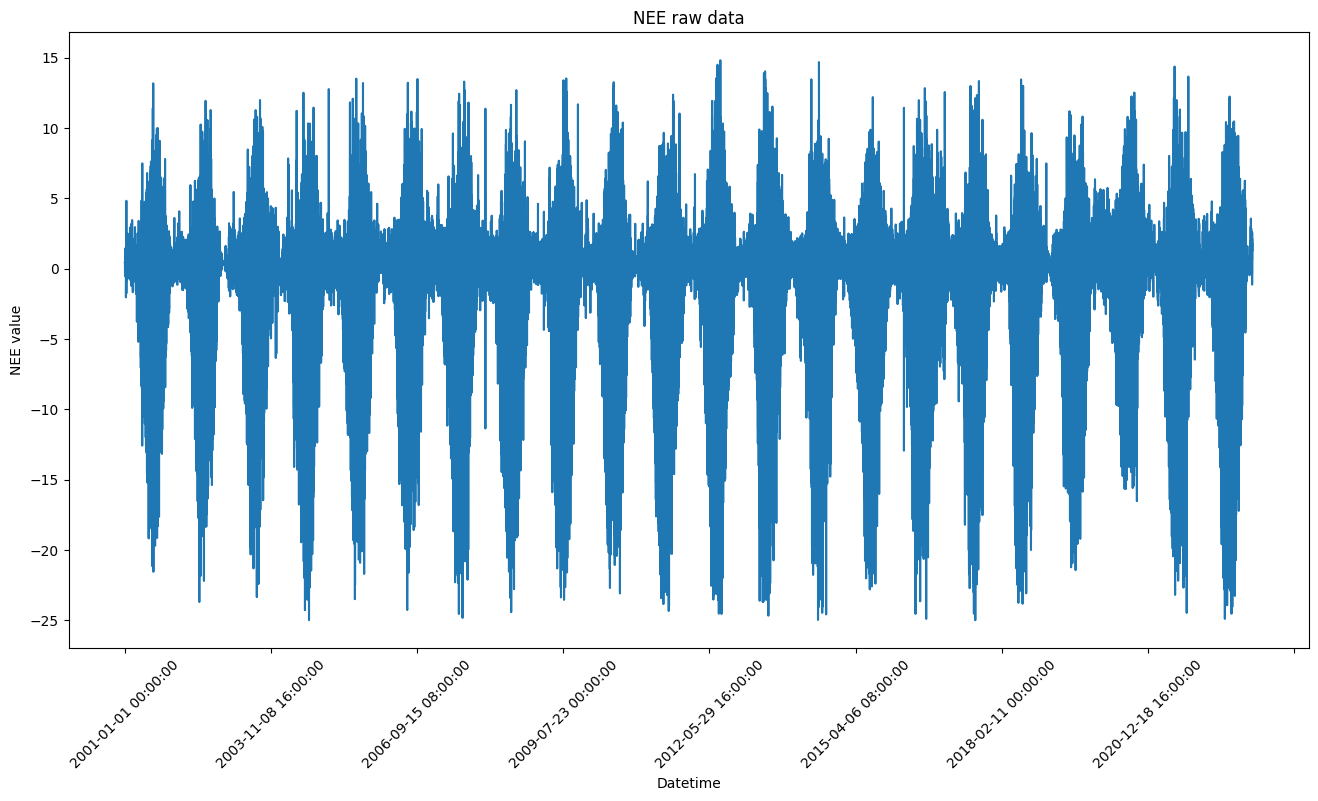

In [32]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,8))
df1.plot('Datetime','NEE', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('NEE value')
ax.set_title('NEE raw data')

# Don't show legend
ax.get_legend().remove()

# Grid and rotation for better readability
plt.xticks(rotation=45)

plt.show()

### VOC

In [14]:
df2.head()

Unnamed: 0             Datetime  monoterpene_flux  methanol_flux  \
0           0  2010-05-28 17:22:00          47.81872       -2.07877   
1           1  2010-05-28 20:22:00           9.34395        0.66285   
2           2  2010-05-28 23:22:00          10.63157       -1.77225   
3           3  2010-05-29 02:22:00          12.27364       -2.02885   
4           4  2010-05-29 05:22:00          19.89456       -2.66424   

   acetone_flux  acetaldehyde_flux  
0      -1.91743           -1.50219  
1      -3.22838            0.39991  
2      -3.11930           -0.03744  
3      -2.26063           -0.53726  
4           NaN            0.64042

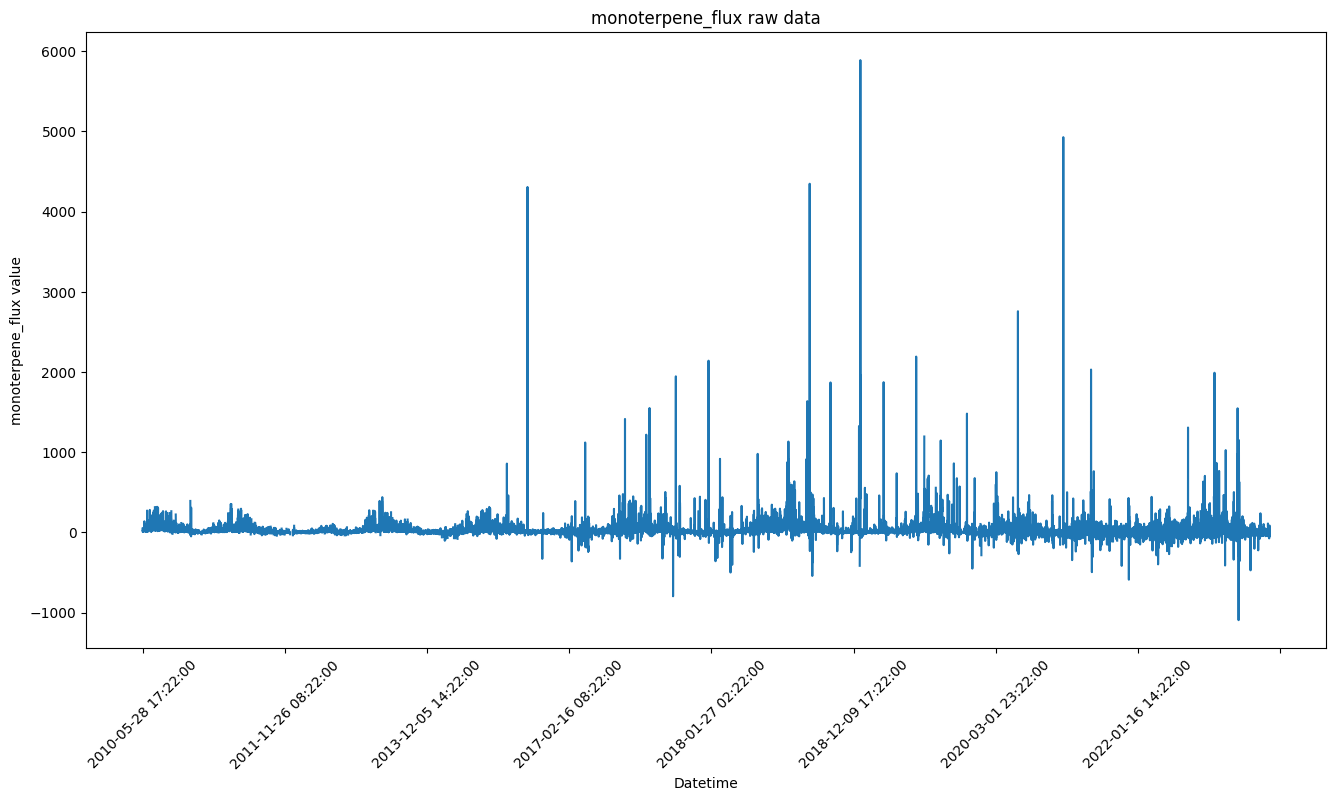

In [31]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,8))
df2.plot('Datetime','monoterpene_flux', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('flux')
ax.set_title('monoterpene_flux raw data')

# Don't show legend
ax.get_legend().remove()

# Grid and rotation for better readability
plt.xticks(rotation=45)

plt.show()

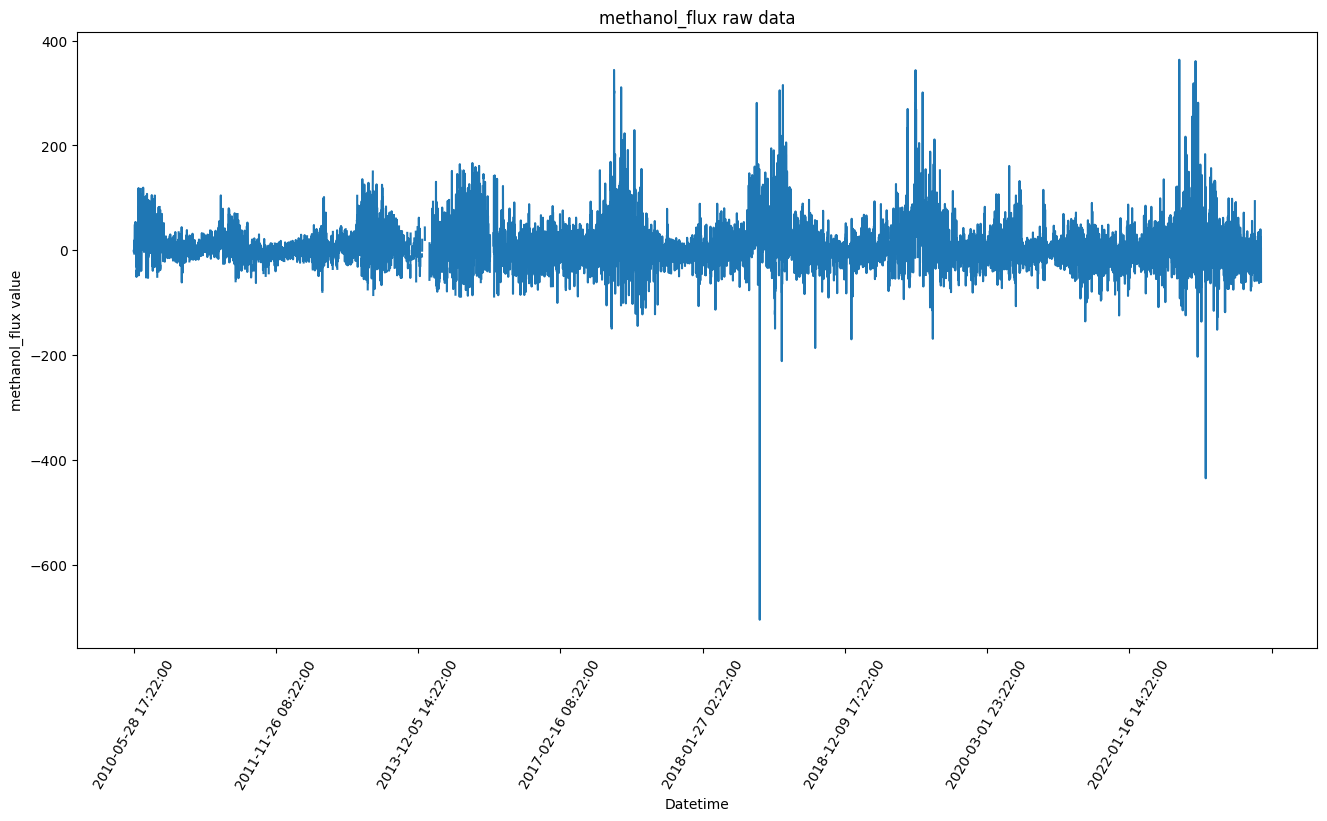

In [30]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,8))
df2.plot('Datetime','methanol_flux', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('flux')
ax.set_title('methanol_flux raw data')

# Don't show legend
ax.get_legend().remove()

# Grid and rotation for better readability
plt.xticks(rotation=60)

plt.show()


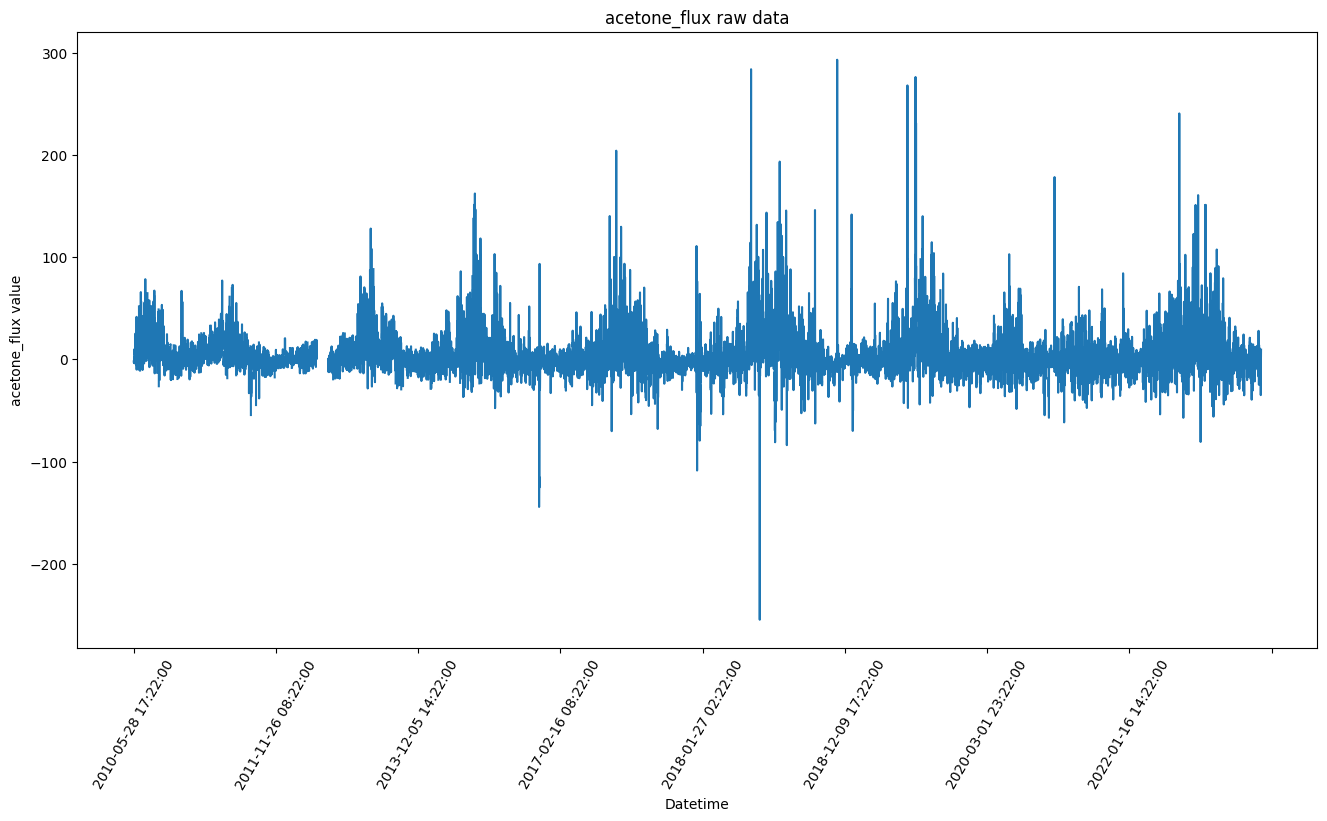

In [33]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,8))
df2.plot('Datetime','acetone_flux', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('flux')
ax.set_title('acetone_flux raw data')

# Don't show legend
ax.get_legend().remove()

# Grid and rotation for better readability
plt.xticks(rotation=60)

plt.show()

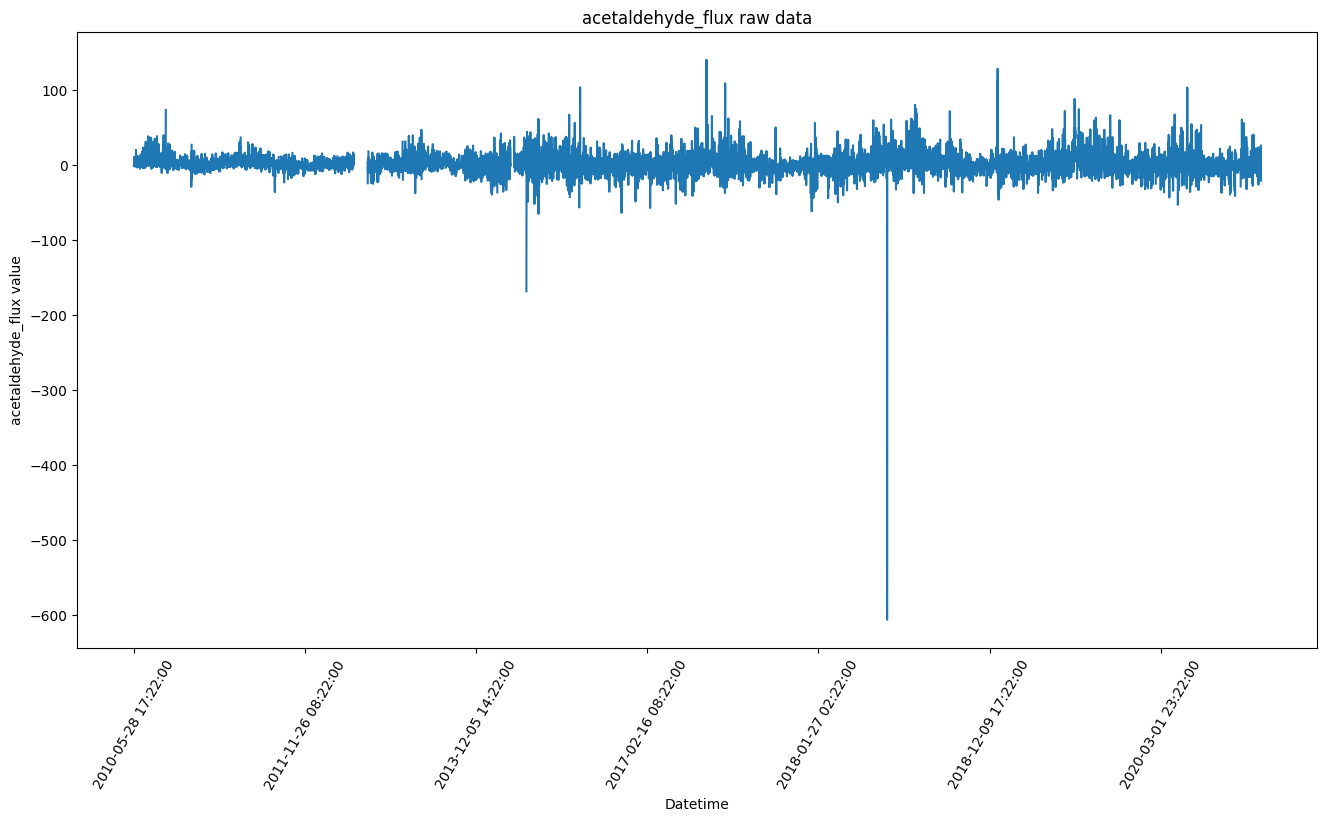

In [34]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,8))
df2.plot('Datetime','acetaldehyde_flux', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('flux')
ax.set_title('acetaldehyde_flux raw data')

# Don't show legend
ax.get_legend().remove()

# Grid and rotation for better readability
plt.xticks(rotation=60)

plt.show()


### Latent heat flux

In [54]:
df3.head()

Unnamed: 0             Datetime  latent_heat_flux_after_4-2018  \
0           0  2018-04-01 00:00:00                       -0.10731   
1           1  2018-04-01 01:30:00                        0.36941   
2           2  2018-04-01 02:00:00                       -0.51663   
3           3  2018-04-01 02:30:00                        0.05330   
4           4  2018-04-01 03:00:00                        1.07773   

   latent_heat_flux_quality_flag_after_4-2018  HYY_EDDY233.LE  
0                                         1.0             NaN  
1                                         1.0             NaN  
2                                         1.0             NaN  
3                                         1.0             NaN  
4                                         1.0             NaN

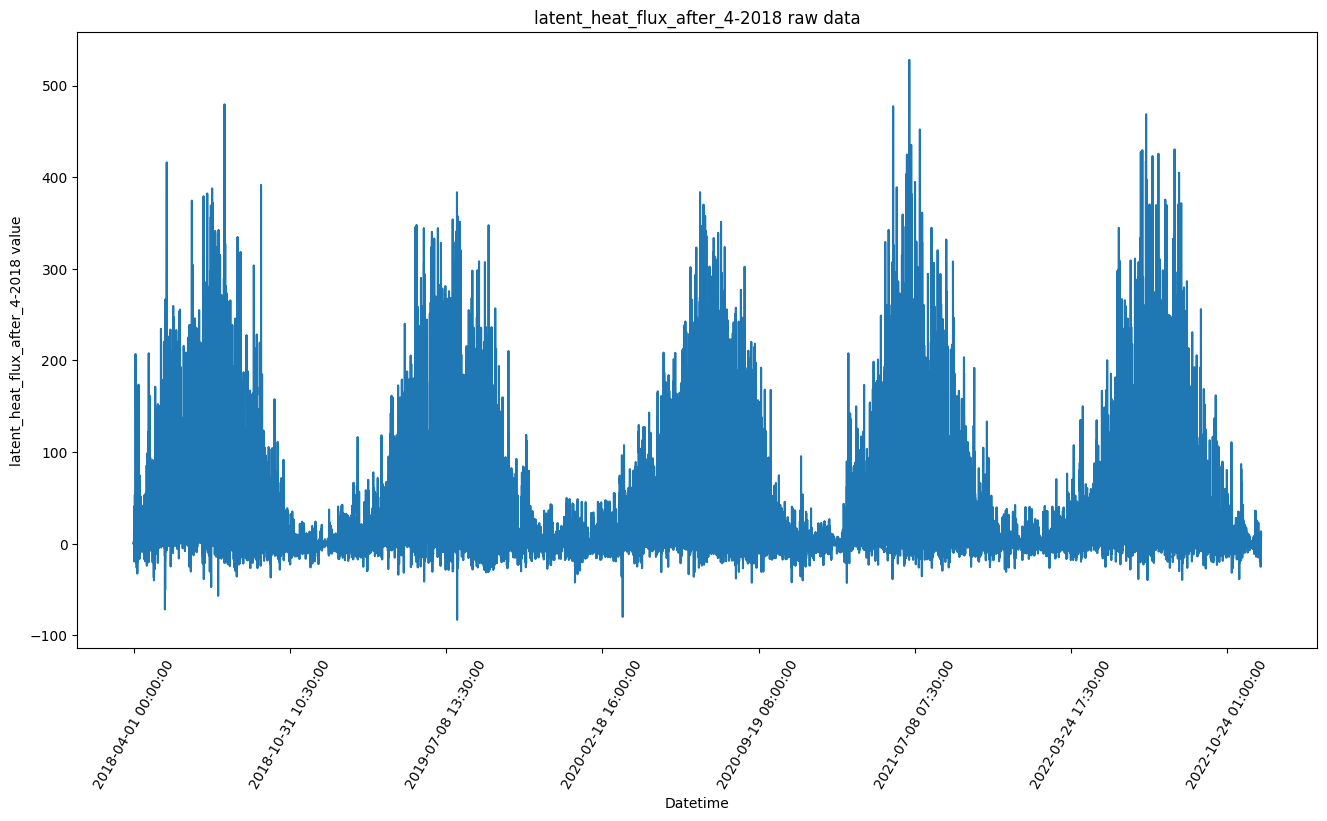

In [52]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,8))
df3.plot('Datetime','latent_heat_flux_after_4-2018', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('flux')
ax.set_title('latent_heat_flux_after_4-2018 raw data')

# Don't show legend
ax.get_legend().remove()

# Grid and rotation for better readability
plt.xticks(rotation=60)

plt.show()

In [55]:
df4.head()

Datetime  latent_heat_flux_after_4-2018  HYY_EDDY233.LE
0  2001-01-01 00:00:00                            NaN         1.41180
1  2001-01-01 00:30:00                            NaN         1.19590
2  2001-01-01 01:00:00                            NaN         1.16250
3  2001-01-01 01:30:00                            NaN         0.10336
4  2001-01-01 02:00:00                            NaN         0.20723

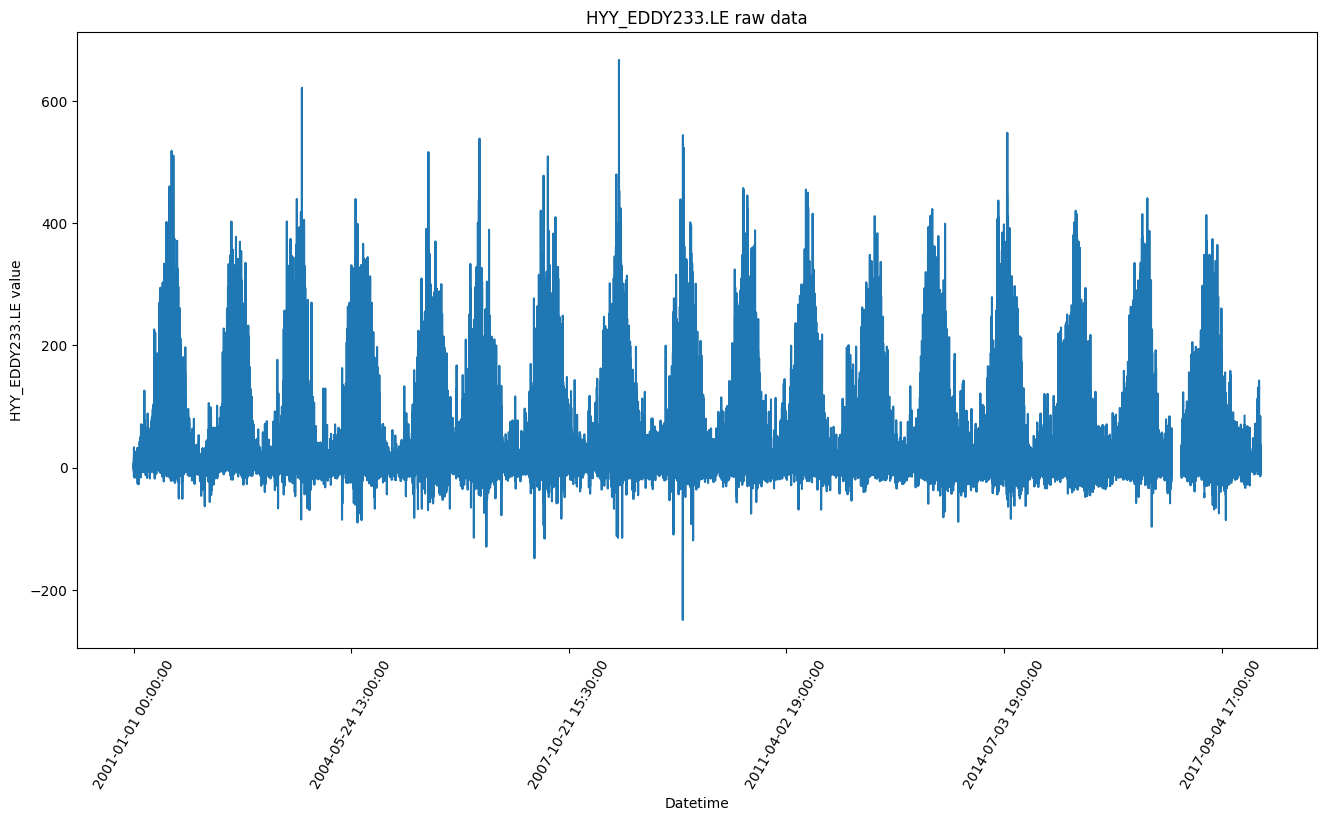

In [53]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,8))
df4.plot('Datetime','HYY_EDDY233.LE', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('HYY_EDDY233.LE')
ax.set_title('HYY_EDDY233.LE raw data')

# Don't show legend
ax.get_legend().remove()

# Grid and rotation for better readability
plt.xticks(rotation=60)

plt.show()

## Daily data

In [148]:
# Convert dates to datetime objects
df1['Datetime'] = pd.to_datetime(df1['Datetime'])
df2['Datetime'] = pd.to_datetime(df2['Datetime'])
df3['Datetime'] = pd.to_datetime(df3['Datetime'])
df4['Datetime'] = pd.to_datetime(df4['Datetime'])

# Aggregate to daily level
daily_df1 = df1.resample('D', on = 'Datetime').mean().reset_index()
daily_df2 = df2.resample('D', on = 'Datetime').mean().reset_index()
daily_df3 = df3.resample('D', on = 'Datetime').mean().reset_index()
daily_df4 = df4.resample('D', on = 'Datetime').mean().reset_index()

### GPP NEE flux

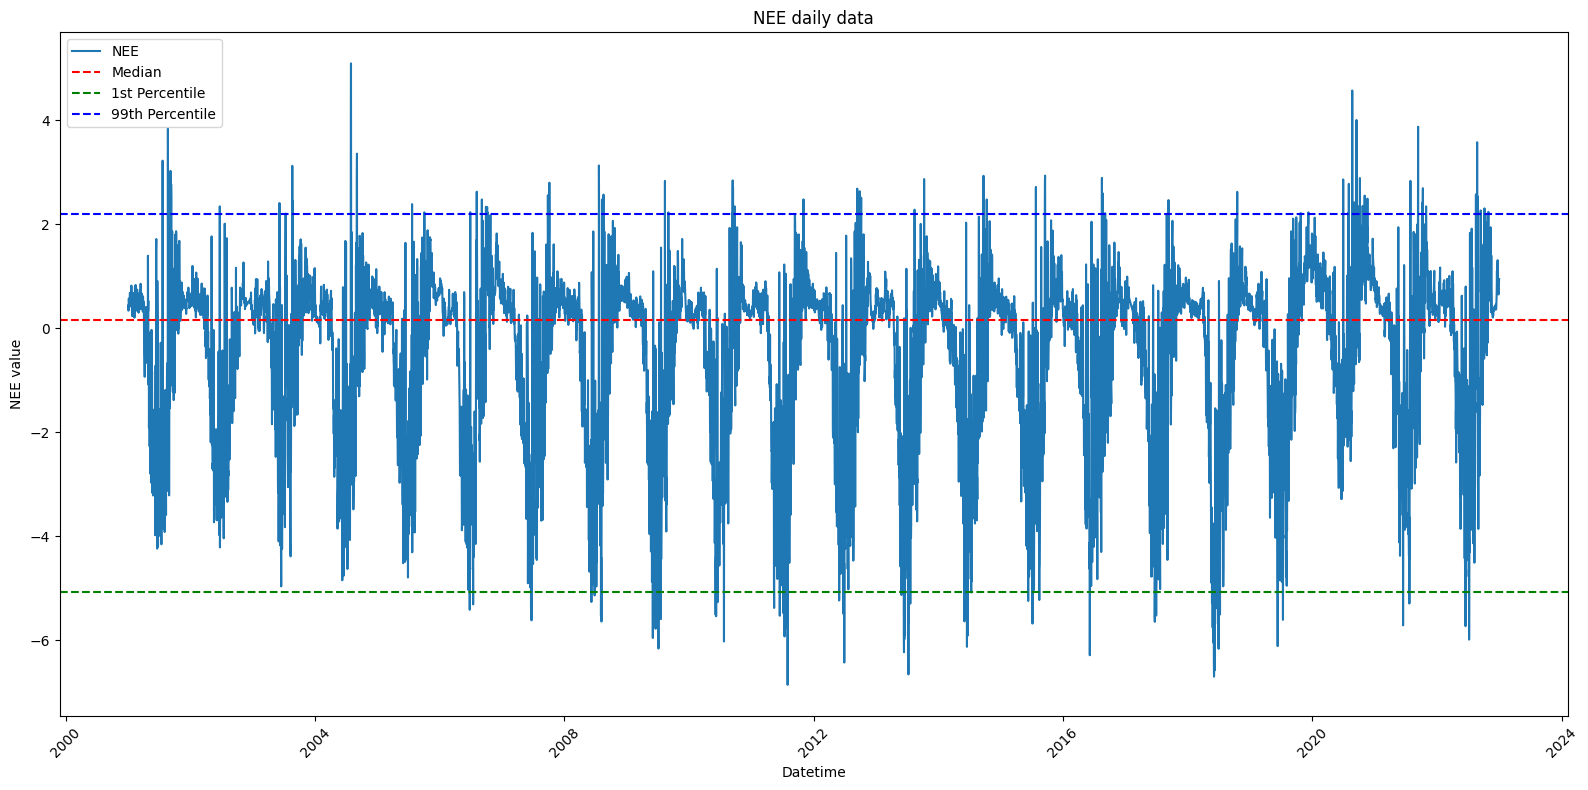

In [60]:
# Calculate median and the percentiles
median = daily_df1['NEE'].median()
q01 = daily_df1['NEE'].quantile(0.01)
q99 = daily_df1['NEE'].quantile(0.99)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(daily_df1['Datetime'], daily_df1['NEE'], label='NEE')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q01, color='g', linestyle='--', label='1st Percentile')
ax.axhline(y=q99, color='b', linestyle='--', label='99th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('NEE')
ax.set_title('NEE daily data')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

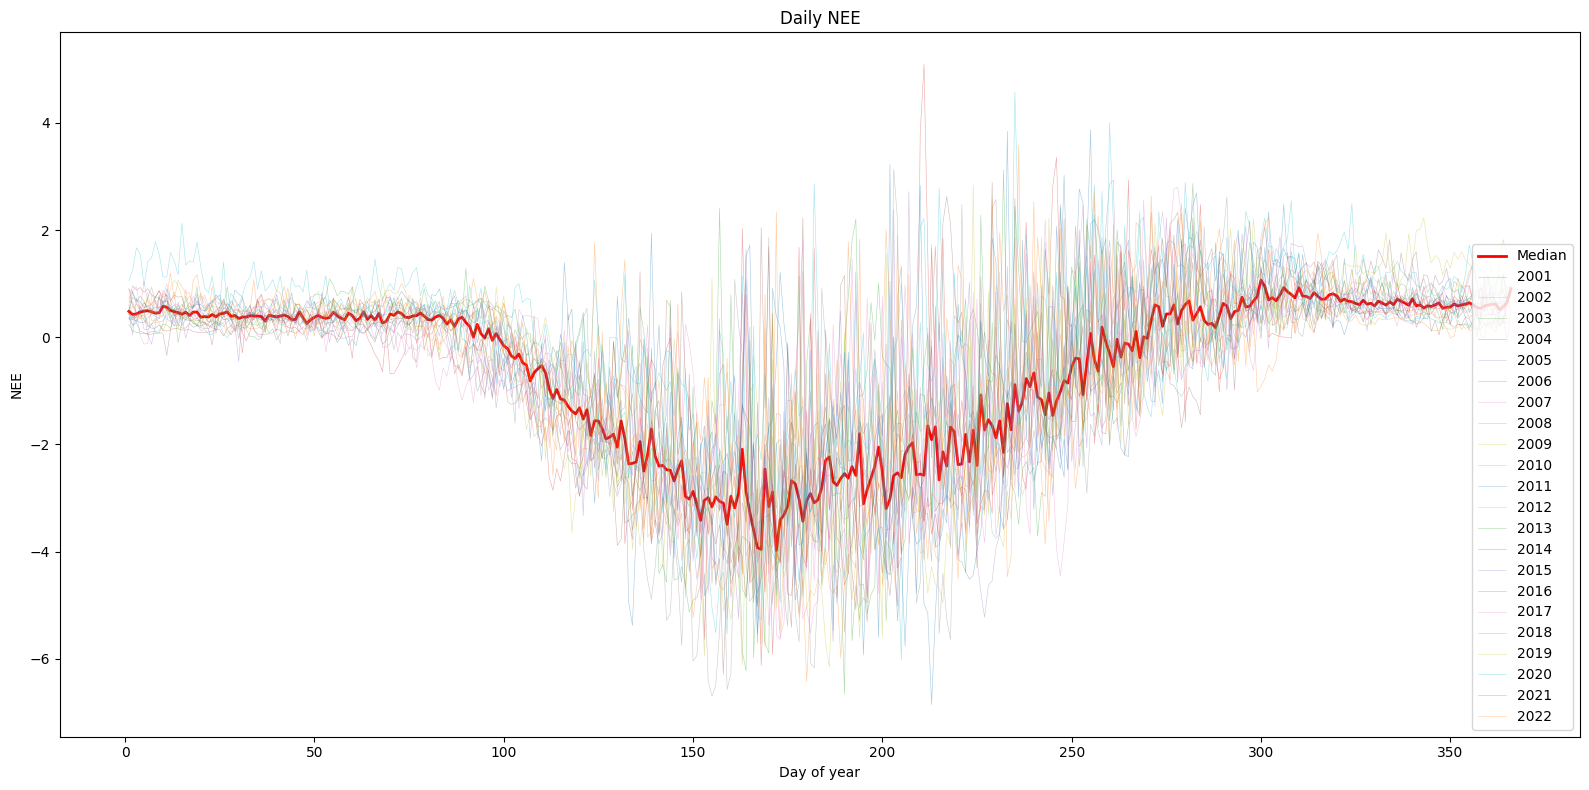

In [129]:
# Create a copy of the dataframe to avoid modifying the original
daily_df1_years = daily_df1.copy()

# Add a column for the day of year
daily_df1_years['day'] = daily_df1_years['Datetime'].dt.dayofyear

# Add a column for the year
daily_df1_years['year'] = daily_df1_years['Datetime'].dt.year

# Drop the column 'Datetime'
daily_df1_years = daily_df1_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
daily_df1_years = daily_df1_years.pivot(index='day', columns='year', values='NEE')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
# ax.fill_between(daily_df1_years.index, daily_df1_years.quantile(0.025, axis=1), daily_df1_years.quantile(0.975, axis=1), alpha=0.4)

# Plot the median
daily_df1_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
daily_df1_years.plot(ax=ax, alpha=0.4, linewidth=0.4)

# Add labels, title, and legend
ax.set_xlabel('Day of year')
ax.set_ylabel('NEE')
ax.set_title('Daily NEE')
ax.legend(['Median'] + daily_df1_years.columns.tolist(), loc='lower right')

plt.tight_layout()

plt.show()

### VOC

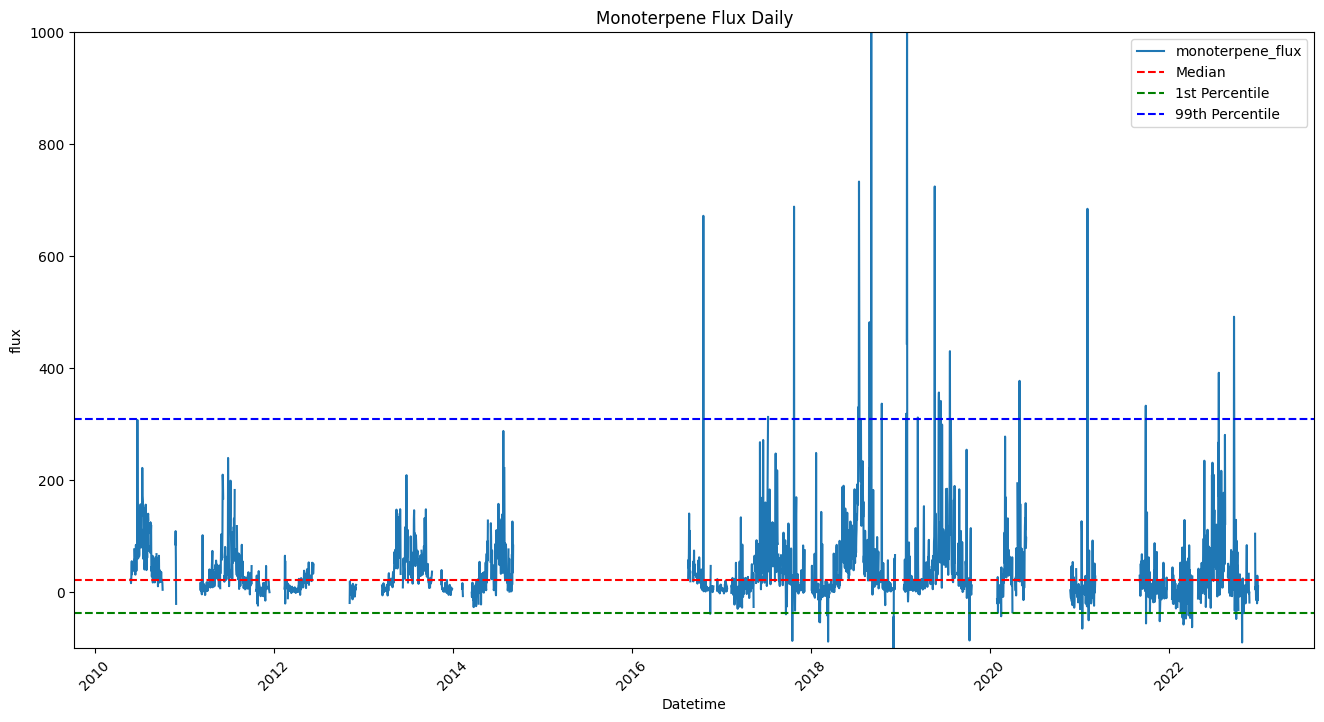

In [226]:
# Calculate median and the percentiles
median = daily_df2['monoterpene_flux'].median()
q01 = daily_df2['monoterpene_flux'].quantile(0.01)
q99 = daily_df2['monoterpene_flux'].quantile(0.99)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(daily_df2['Datetime'], daily_df2['monoterpene_flux'], label='monoterpene_flux')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q01, color='g', linestyle='--', label='1st Percentile')
ax.axhline(y=q99, color='b', linestyle='--', label='99th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('flux')
ax.set_title('Monoterpene Flux Daily')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Set y-axis limits
ax.set_ylim(-100, 1000)

# plt.tight_layout()
plt.show()


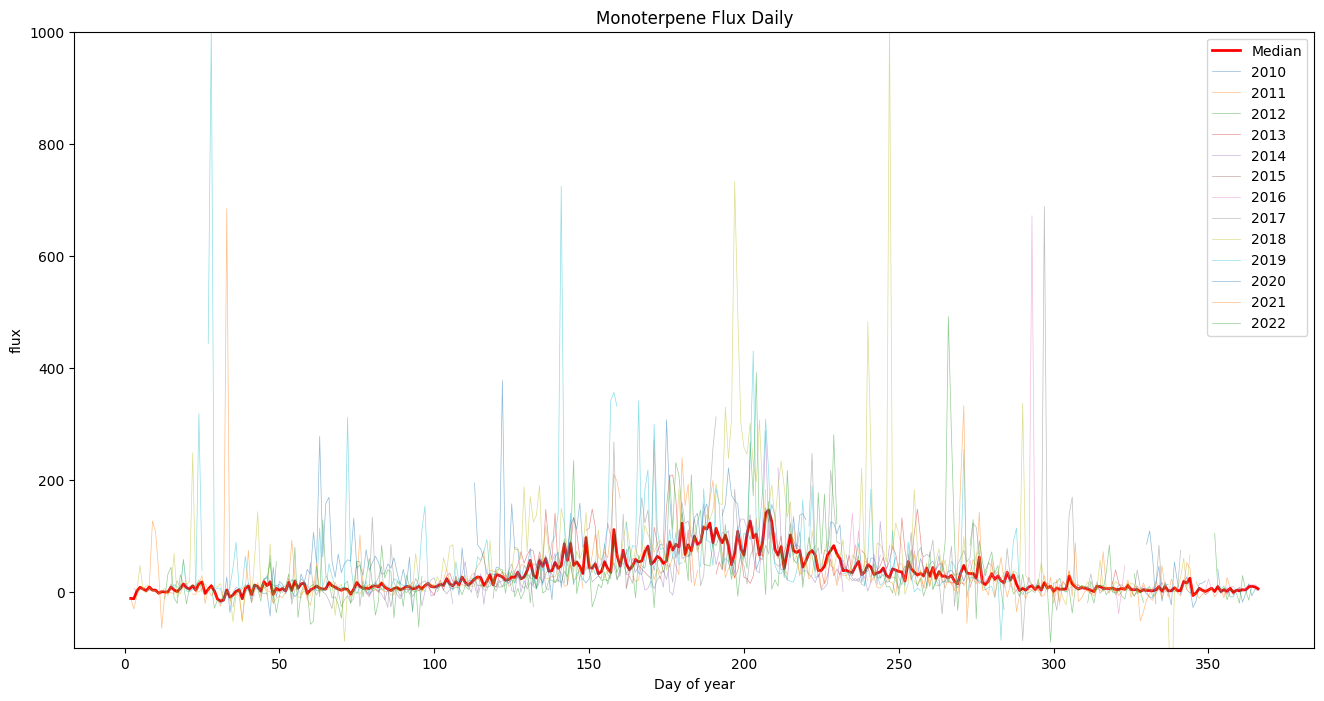

In [227]:
# Create a copy of the dataframe to avoid modifying the original
daily_df2_years = daily_df2.copy()

# Add a column for the day of year
daily_df2_years['day'] = daily_df2_years['Datetime'].dt.dayofyear

# Add a column for the year
daily_df2_years['year'] = daily_df2_years['Datetime'].dt.year

# Drop the column 'Datetime'
daily_df2_years = daily_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
daily_df2_years = daily_df2_years.pivot(index='day', columns='year', values='monoterpene_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
# ax.fill_between(daily_df2_years.index, daily_df2_years.quantile(0.1, axis=1), daily_df2_years.quantile(0.9, axis=1), alpha=0.4)

# Plot the median
daily_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individual years
daily_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Day of year')
ax.set_ylabel('flux')
ax.set_title('Monoterpene Flux Daily')
ax.legend(['Median'] + daily_df2_years.columns.tolist(), loc='upper right')

# Set y-axis limits
ax.set_ylim(-100, 1000)

# plt.tight_layout()
plt.show()

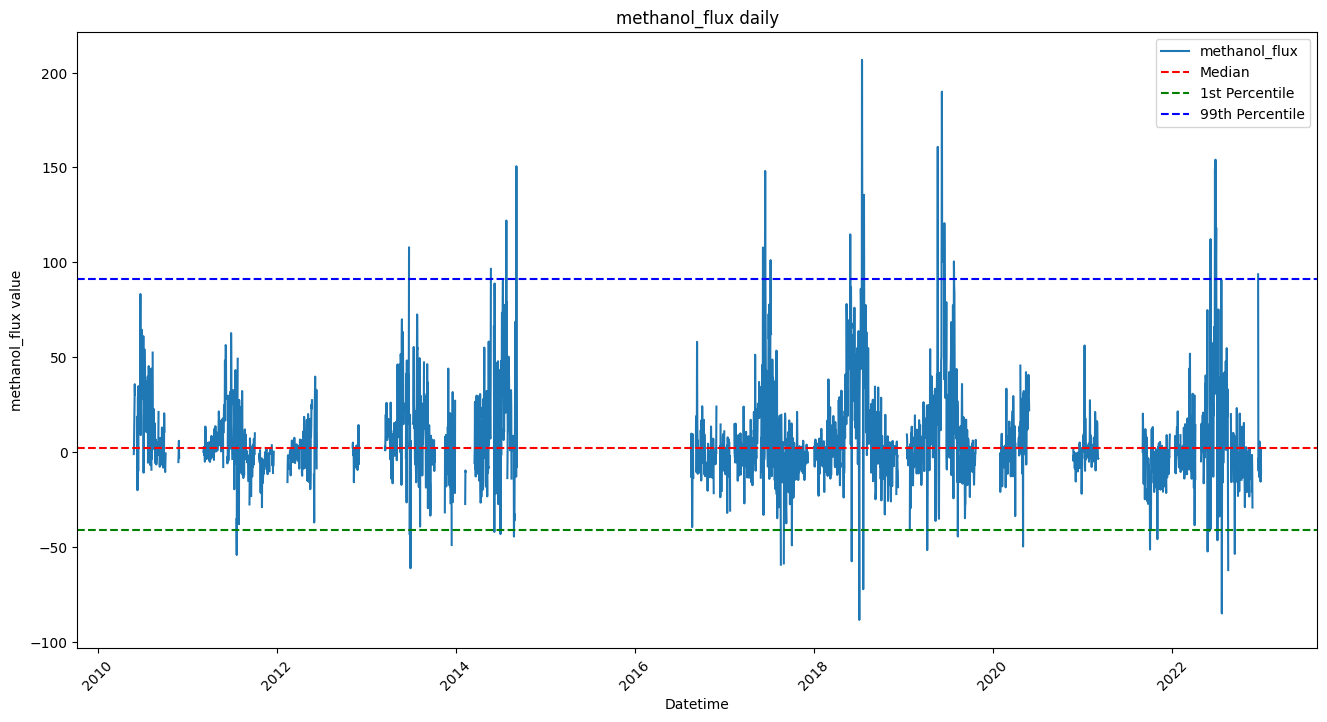

In [102]:
# Calculate median and the percentiles
median = daily_df2['methanol_flux'].median()
q01 = daily_df2['methanol_flux'].quantile(0.01)
q99 = daily_df2['methanol_flux'].quantile(0.99)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(daily_df2['Datetime'], daily_df2['methanol_flux'], label='methanol_flux')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q01, color='g', linestyle='--', label='1st Percentile')
ax.axhline(y=q99, color='b', linestyle='--', label='99th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('flux')
ax.set_title('Methanol Flux Daily')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# plt.tight_layout()
plt.show()


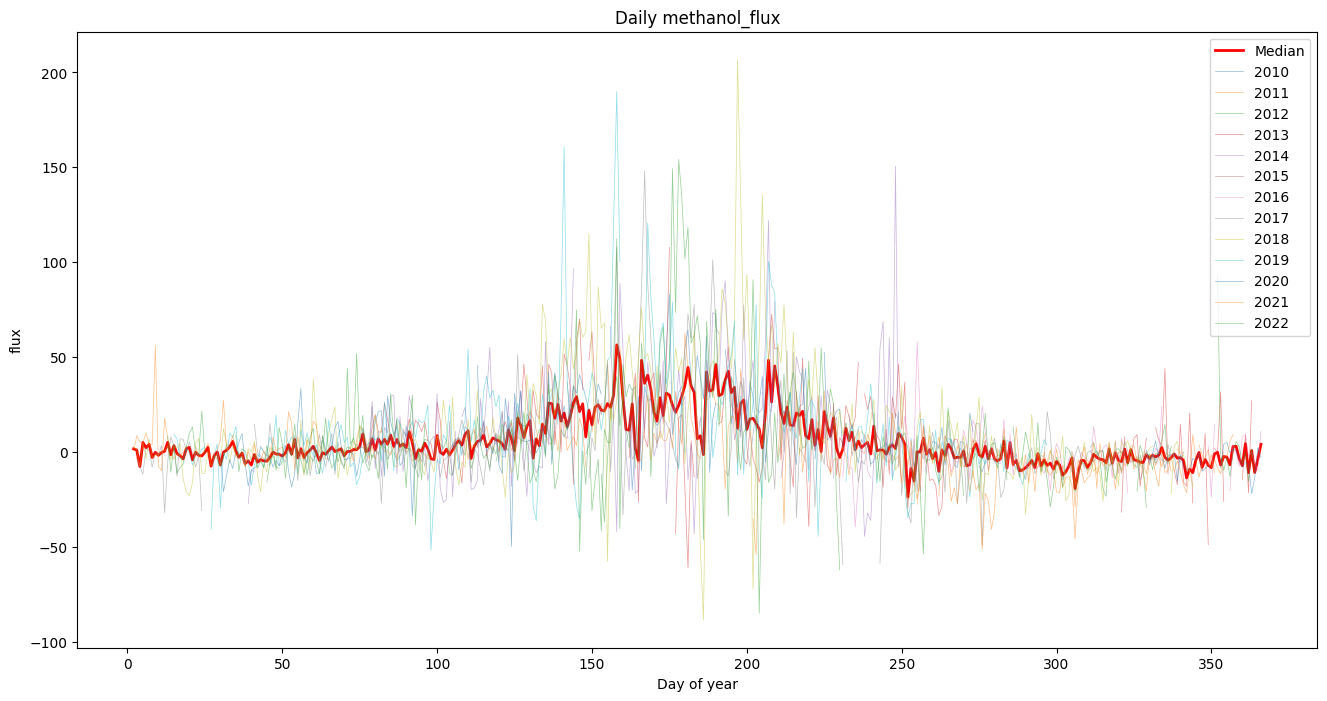

In [221]:
# Create a copy of the dataframe to avoid modifying the original
daily_df2_years = daily_df2.copy()

# Add a column for the day of year
daily_df2_years['day'] = daily_df2_years['Datetime'].dt.dayofyear

# Add a column for the year
daily_df2_years['year'] = daily_df2_years['Datetime'].dt.year

# Drop the column 'Datetime'
daily_df2_years = daily_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
daily_df2_years = daily_df2_years.pivot(index='day', columns='year', values='methanol_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
# ax.fill_between(daily_df2_years.index, daily_df2_years.quantile(0.1, axis=1), daily_df2_years.quantile(0.9, axis=1), alpha=0.4)

# Plot the median
daily_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individual years
daily_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Day of year')
ax.set_ylabel('flux')
ax.set_title('Methanol Flux Daily')
ax.legend(['Median'] + daily_df2_years.columns.tolist(), loc='upper right')

# Set y-axis limits 
# ax.set_ylim(-75, 175)

# plt.tight_layout()
plt.show()

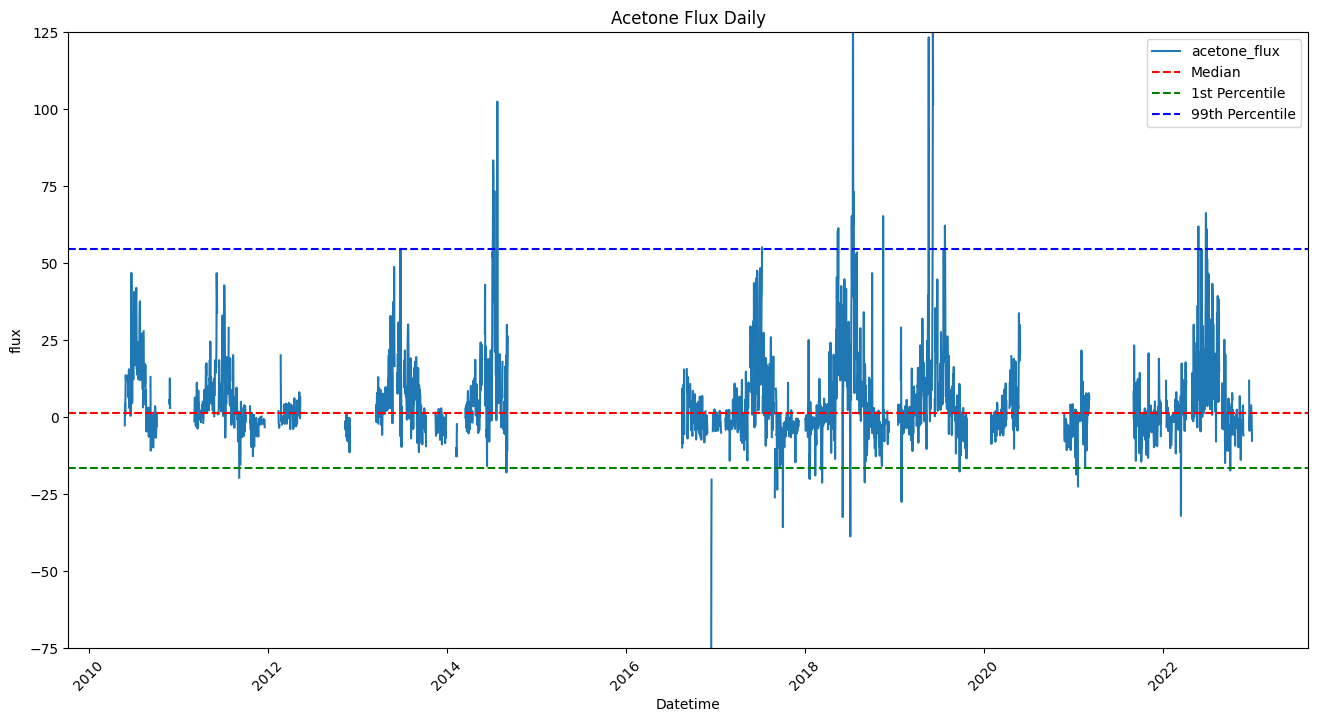

In [220]:
# Calculate median and the percentiles
median = daily_df2['acetone_flux'].median()
q01 = daily_df2['acetone_flux'].quantile(0.01)
q99 = daily_df2['acetone_flux'].quantile(0.99)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(daily_df2['Datetime'], daily_df2['acetone_flux'], label='acetone_flux')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q01, color='g', linestyle='--', label='1st Percentile')
ax.axhline(y=q99, color='b', linestyle='--', label='99th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('flux')
ax.set_title('Acetone Flux Daily')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Set y-axis limits 
ax.set_ylim(-75, 125)

# plt.tight_layout()
plt.show()

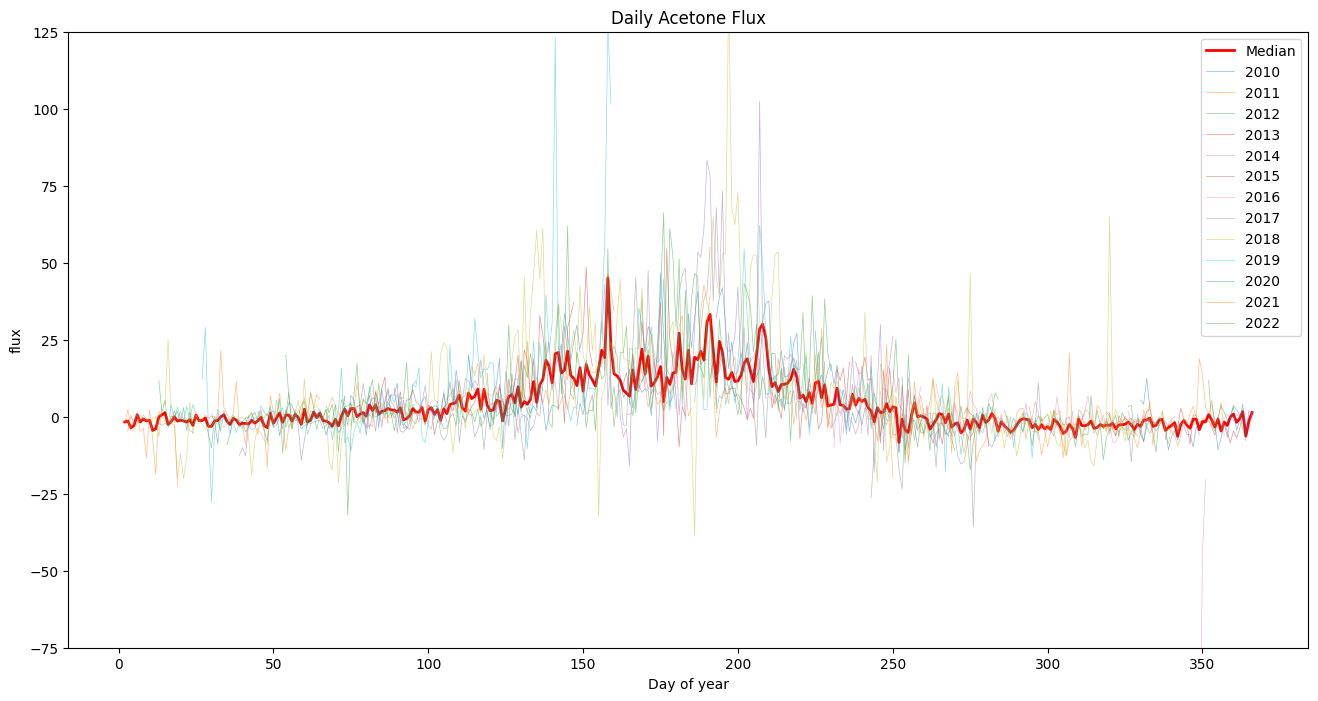

In [219]:
# Create a copy of the dataframe to avoid modifying the original
daily_df2_years = daily_df2.copy()

# Add a column for the day of year
daily_df2_years['day'] = daily_df2_years['Datetime'].dt.dayofyear

# Add a column for the year
daily_df2_years['year'] = daily_df2_years['Datetime'].dt.year

# Drop the column 'Datetime'
daily_df2_years = daily_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
daily_df2_years = daily_df2_years.pivot(index='day', columns='year', values='acetone_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
# ax.fill_between(daily_df2_years.index, daily_df2_years.quantile(0.1, axis=1), daily_df2_years.quantile(0.9, axis=1), alpha=0.25)

# Plot the median
daily_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individual years
daily_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Day of year')
ax.set_ylabel('flux')
ax.set_title('Daily Acetone Flux')
ax.legend(['Median'] + daily_df2_years.columns.tolist(), loc='upper right')

# Set y-axis limits 
ax.set_ylim(-75, 125)

# plt.tight_layout()
plt.show()


### Latent heat flux

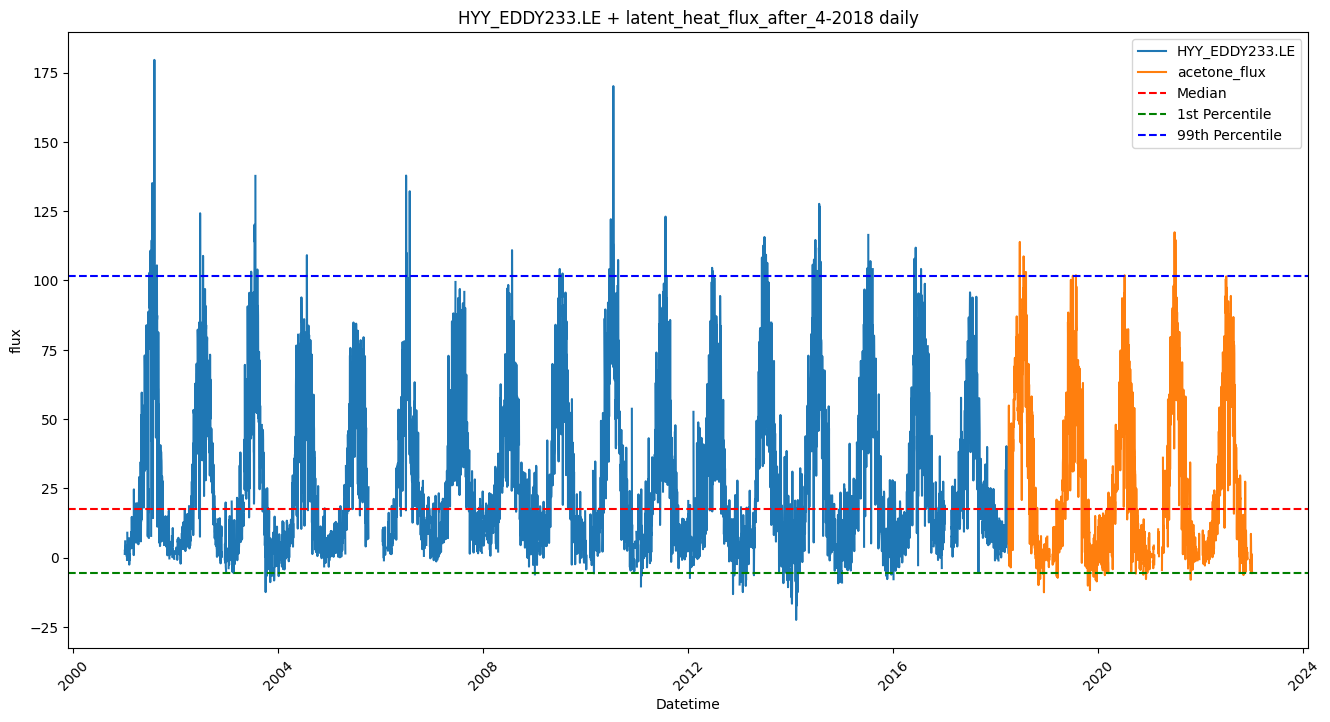

In [167]:
# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Calculate combined median and percentiles
combined_series = pd.concat([daily_df4['HYY_EDDY233.LE'], daily_df3['latent_heat_flux_after_4-2018']], axis=0)
median = combined_series.median()
q01 = combined_series.quantile(0.01)
q99 = combined_series.quantile(0.99)

# Plot the lines
ax.plot(daily_df4['Datetime'], daily_df4['HYY_EDDY233.LE'], label='HYY_EDDY233.LE')
ax.plot(daily_df3['Datetime'], daily_df3['latent_heat_flux_after_4-2018'], label='acetone_flux')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q01, color='g', linestyle='--', label='1st Percentile')
ax.axhline(y=q99, color='b', linestyle='--', label='99th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('flux')
ax.set_title('HYY_EDDY233.LE + latent_heat_flux_after_4-2018 daily')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Set y-axis limits 

# ax.set_ylim(-50, 125)

# plt.tight_layout()
plt.show()

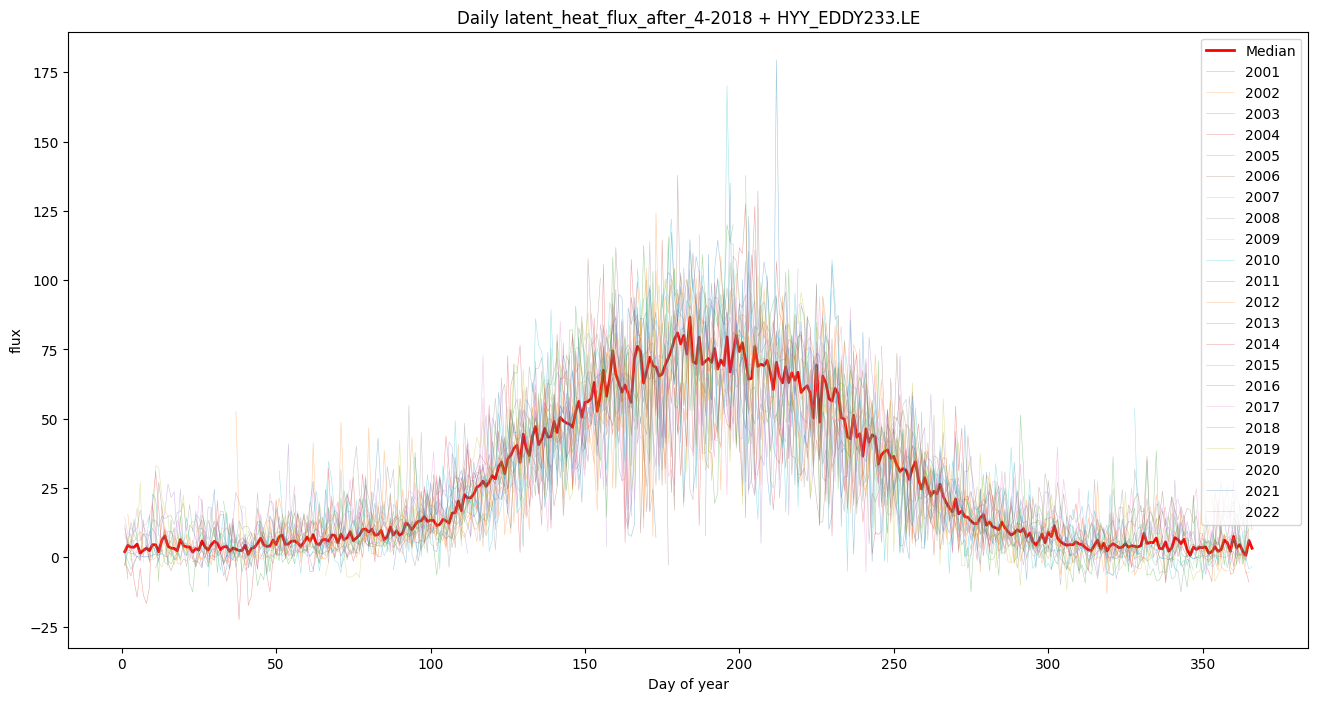

In [257]:
# Create a copy of the dataframe to avoid modifying the original
daily_df3_years = daily_df3.copy()
daily_df4_years = daily_df4.copy()

# Rename columns to 'flux'
daily_df3_years = daily_df3_years.rename(columns={'latent_heat_flux_after_4-2018': 'flux'})
daily_df4_years = daily_df4_years.rename(columns={'HYY_EDDY233.LE': 'flux'})

#Concatenate the dataframes
daily_df34_years = pd.concat([daily_df4_years[['Datetime', 'flux']],
                        daily_df3_years[['Datetime', 'flux']]],
                       ignore_index=True)

# Add a column for the day of year
daily_df34_years['day'] = daily_df34_years['Datetime'].dt.dayofyear

# Add a column for the year
daily_df34_years['year'] = daily_df34_years['Datetime'].dt.year

# Drop the column 'Datetime'
daily_df34_years = daily_df34_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
daily_df34_years = daily_df34_years.pivot(index='day', columns='year', values='flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
# ax.fill_between(daily_df2_years.index, daily_df2_years.quantile(0.1, axis=1), daily_df2_years.quantile(0.9, axis=1), alpha=0.25)

# Plot the median
daily_df34_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individual years
daily_df34_years.plot(ax=ax, alpha=0.4, linewidth=0.4)

# Add labels, title, and legend
ax.set_xlabel('Day of year')
ax.set_ylabel('flux')
ax.set_title('Daily latent_heat_flux_after_4-2018 + HYY_EDDY233.LE')
ax.legend(['Median'] + daily_df34_years.columns.tolist(), loc='upper right')

# Set y-axis limits 
# ax.set_ylim(-30, 50)

# plt.tight_layout()
plt.show()


## Weekly data

In [193]:
weekly_df1 = df1.resample('W', on = 'Datetime').mean().reset_index()
weekly_df2 = df2.resample('W', on = 'Datetime').mean().reset_index()
weekly_df3 = df3.resample('W', on = 'Datetime').mean().reset_index()
weekly_df4 = df4.resample('W', on = 'Datetime').mean().reset_index()

### GPP NEE flux

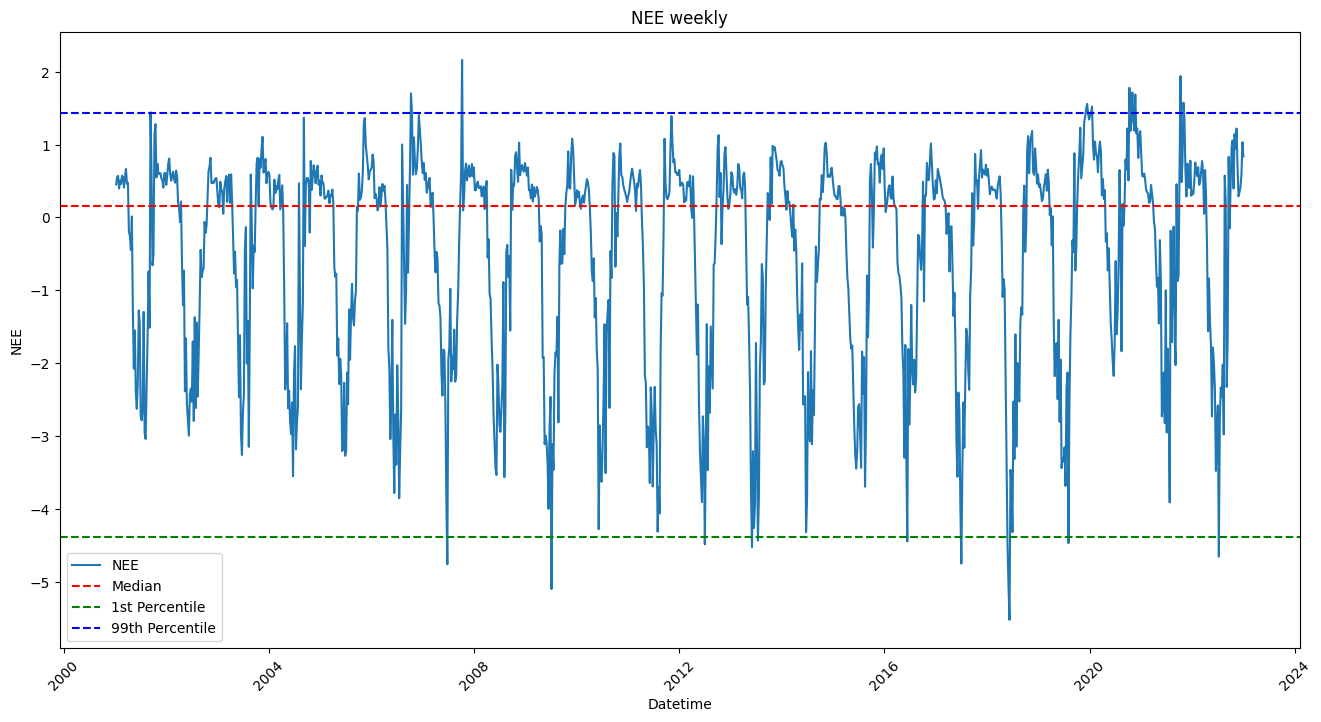

In [194]:
# Calculate median and the percentiles
median = weekly_df1['NEE'].median()
q01 = weekly_df1['NEE'].quantile(0.01)
q99 = weekly_df1['NEE'].quantile(0.99)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(weekly_df1['Datetime'] , weekly_df1['NEE'], label='NEE')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q01, color='g', linestyle='--', label='1st Percentile')
ax.axhline(y=q99, color='b', linestyle='--', label='99th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('NEE')
ax.set_title('NEE weekly')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Set y-axis limits 
# ax.set_ylim(-30, 50)

# plt.tight_layout()
plt.show()


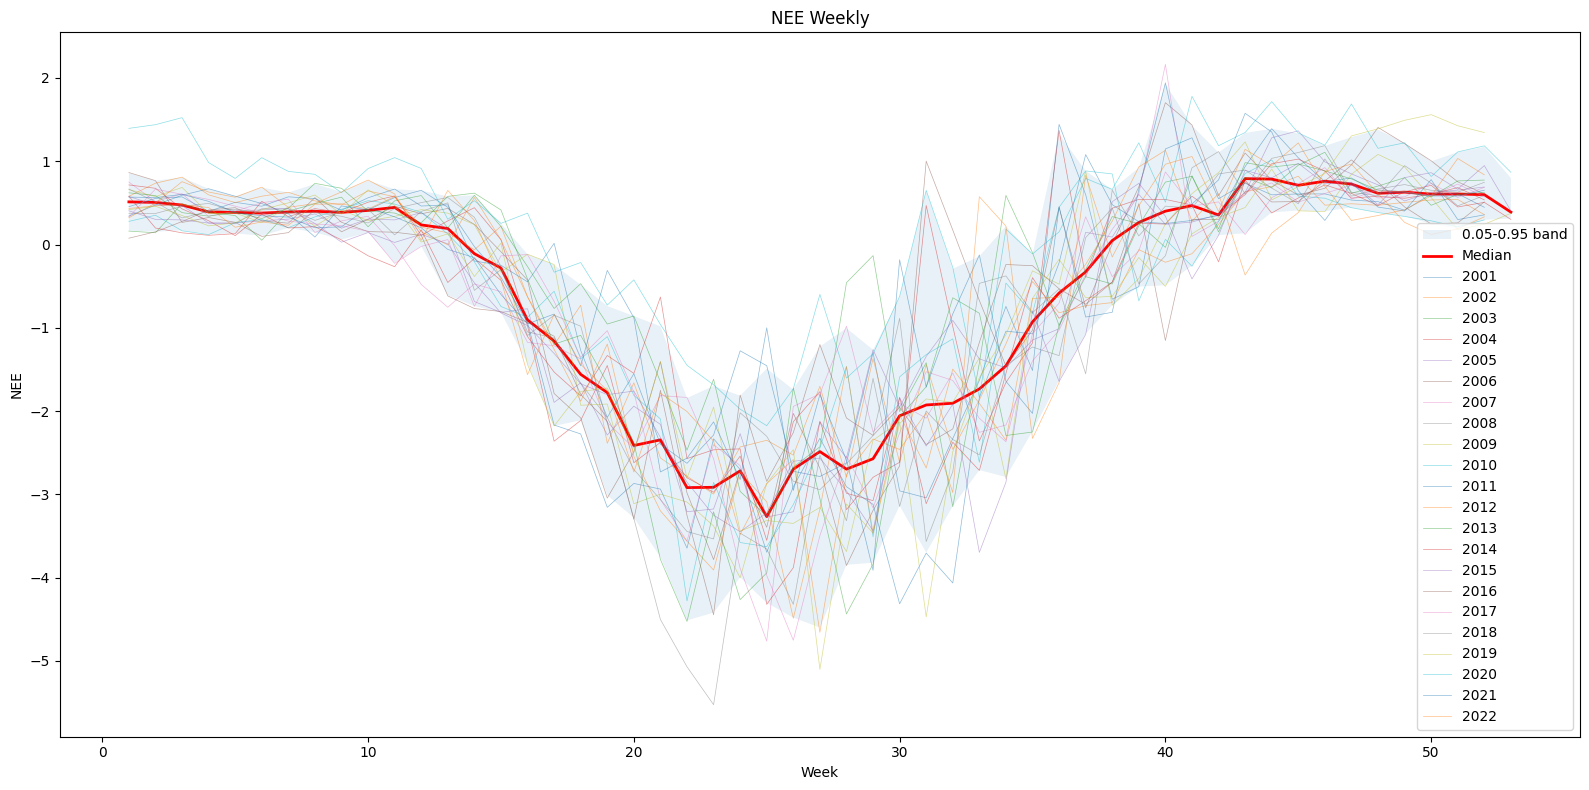

In [195]:
# Create a copy of the dataframe to avoid modifying the original
weekly_df1_years = weekly_df1.copy()

# Add a column for the week number
weekly_df1_years['week'] = weekly_df1_years['Datetime'].dt.isocalendar().week

# Add a column for the year
weekly_df1_years['year'] = weekly_df1_years['Datetime'].dt.isocalendar().year

# Drop the column 'Datetime'
weekly_df1_years = weekly_df1_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
weekly_df1_years = weekly_df1_years.pivot(index='week', columns='year', values='NEE')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the 5th-95th percentile band
ax.fill_between(weekly_df1_years.index, weekly_df1_years.quantile(0.05, axis=1), weekly_df1_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
weekly_df1_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
weekly_df1_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Week')
ax.set_ylabel('NEE')
ax.set_title('NEE Weekly')
ax.legend(['0.05-0.95 band', 'Median'] + weekly_df1_years.columns.tolist(), loc='lower right')

# Set y-axis limits 
# ax.set_ylim(-30, 50)

plt.tight_layout()
plt.show()

### VOC

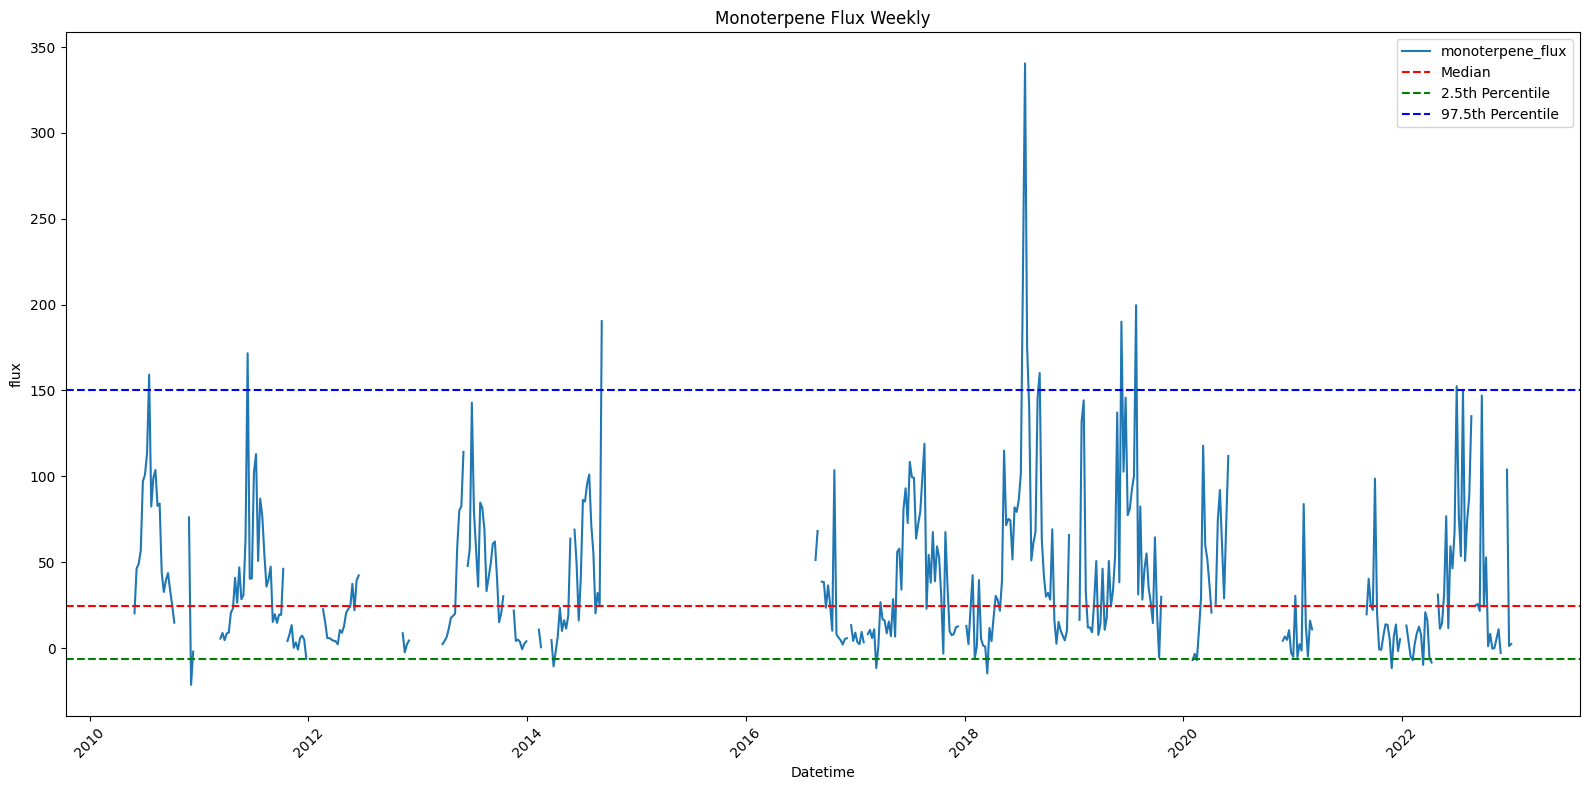

In [196]:
# Calculate median, 10th and 90th percentiles
weekly_df2['median'] = weekly_df2['monoterpene_flux'].median()
weekly_df2['q10'] = weekly_df2['monoterpene_flux'].quantile(0.1)
weekly_df2['q90'] = weekly_df2['monoterpene_flux'].quantile(0.9)

dates = weekly_df2['Datetime']  # Extract dates for clarity
values = weekly_df2['monoterpene_flux']  # Extract NEE values for clarity

# Calculate additional statistics
median = values.median()
q025 = values.quantile(0.025)
q975 = values.quantile(0.975)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(dates, values, label='monoterpene_flux')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q025, color='g', linestyle='--', label='2.5th Percentile')
ax.axhline(y=q975, color='b', linestyle='--', label='97.5th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('flux')
ax.set_title('Monoterpene Flux Weekly')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Set y-axis limits 
# ax.set_ylim(-30, 250)

plt.tight_layout()
plt.show()

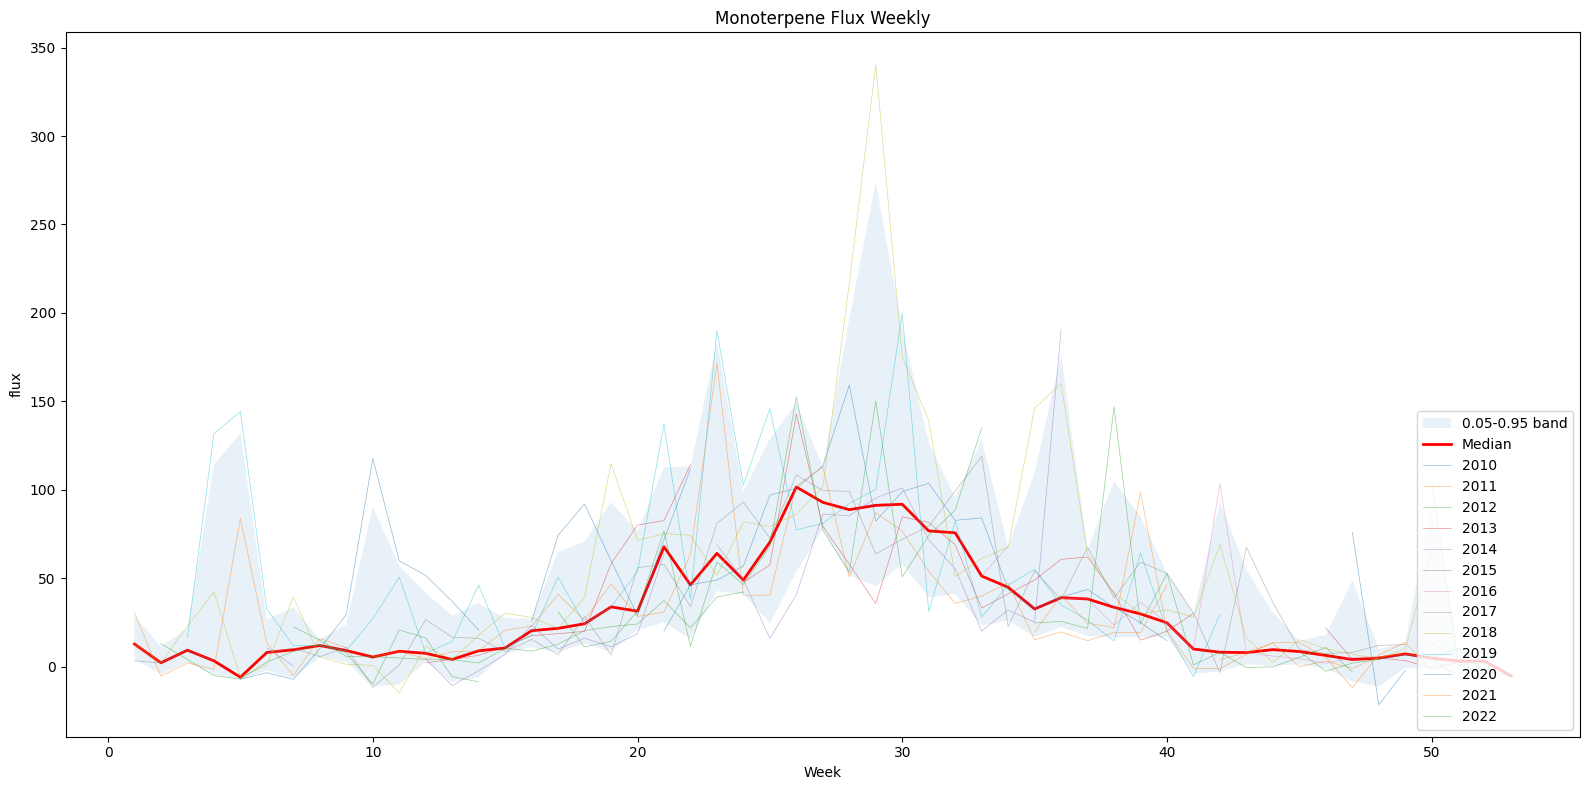

In [212]:
# Create a copy of the dataframe to avoid modifying the original
weekly_df2_years = weekly_df2.copy()

# Add a column for the week number
weekly_df2_years['week'] = weekly_df2_years['Datetime'].dt.isocalendar().week

# Add a column for the year
weekly_df2_years['year'] = weekly_df2_years['Datetime'].dt.isocalendar().year

# Drop the column 'Datetime'
weekly_df2_years = weekly_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
weekly_df2_years = weekly_df2_years.pivot(index='week', columns='year', values='monoterpene_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the 5th-95th percentile band
ax.fill_between(weekly_df2_years.index, weekly_df2_years.quantile(0.05, axis=1), weekly_df2_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
weekly_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
weekly_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Week')
ax.set_ylabel('flux')
ax.set_title('Monoterpene Flux Weekly')
ax.legend(['0.05-0.95 band', 'Median'] + weekly_df2_years.columns.tolist(), loc='lower right')

# Set y-axis limits 
# ax.set_ylim(-30, 250)

plt.tight_layout()
plt.show()

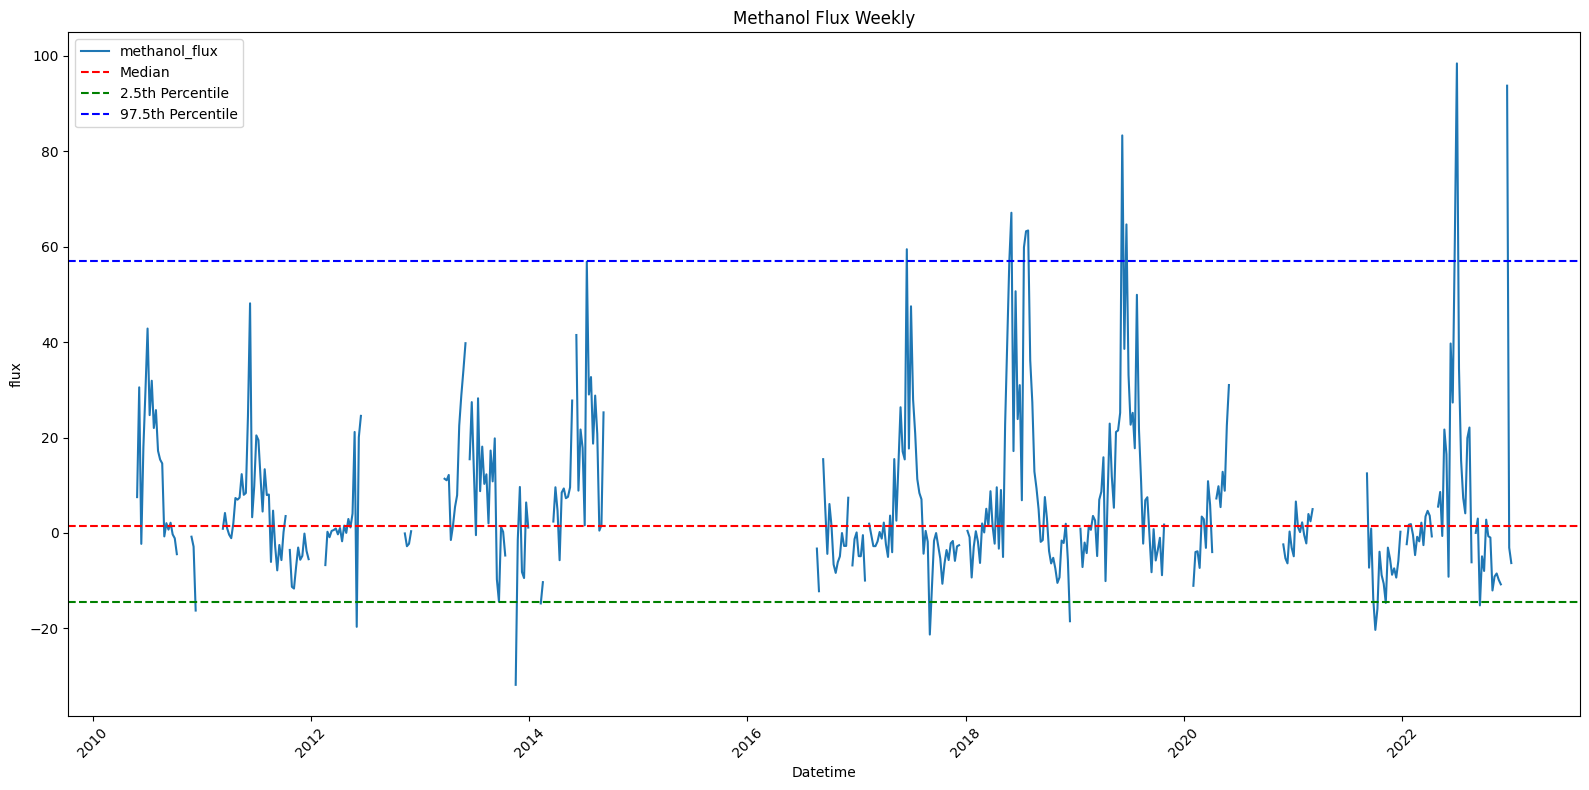

In [201]:
# Calculate median, 10th and 90th percentiles
weekly_df2['median'] = weekly_df2['methanol_flux'].median()
weekly_df2['q10'] = weekly_df2['methanol_flux'].quantile(0.1)
weekly_df2['q90'] = weekly_df2['methanol_flux'].quantile(0.9)

dates = weekly_df2['Datetime']  # Extract dates for clarity
values = weekly_df2['methanol_flux']  # Extract values for clarity

# Calculate additional statistics
median = values.median()
q025 = values.quantile(0.025)
q975 = values.quantile(0.975)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(dates, values, label='methanol_flux')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q025, color='g', linestyle='--', label='2.5th Percentile')
ax.axhline(y=q975, color='b', linestyle='--', label='97.5th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('flux')
ax.set_title('Methanol Flux Weekly')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Set y-axis limits 
# ax.set_ylim(-30, 250)

plt.tight_layout()
plt.show()


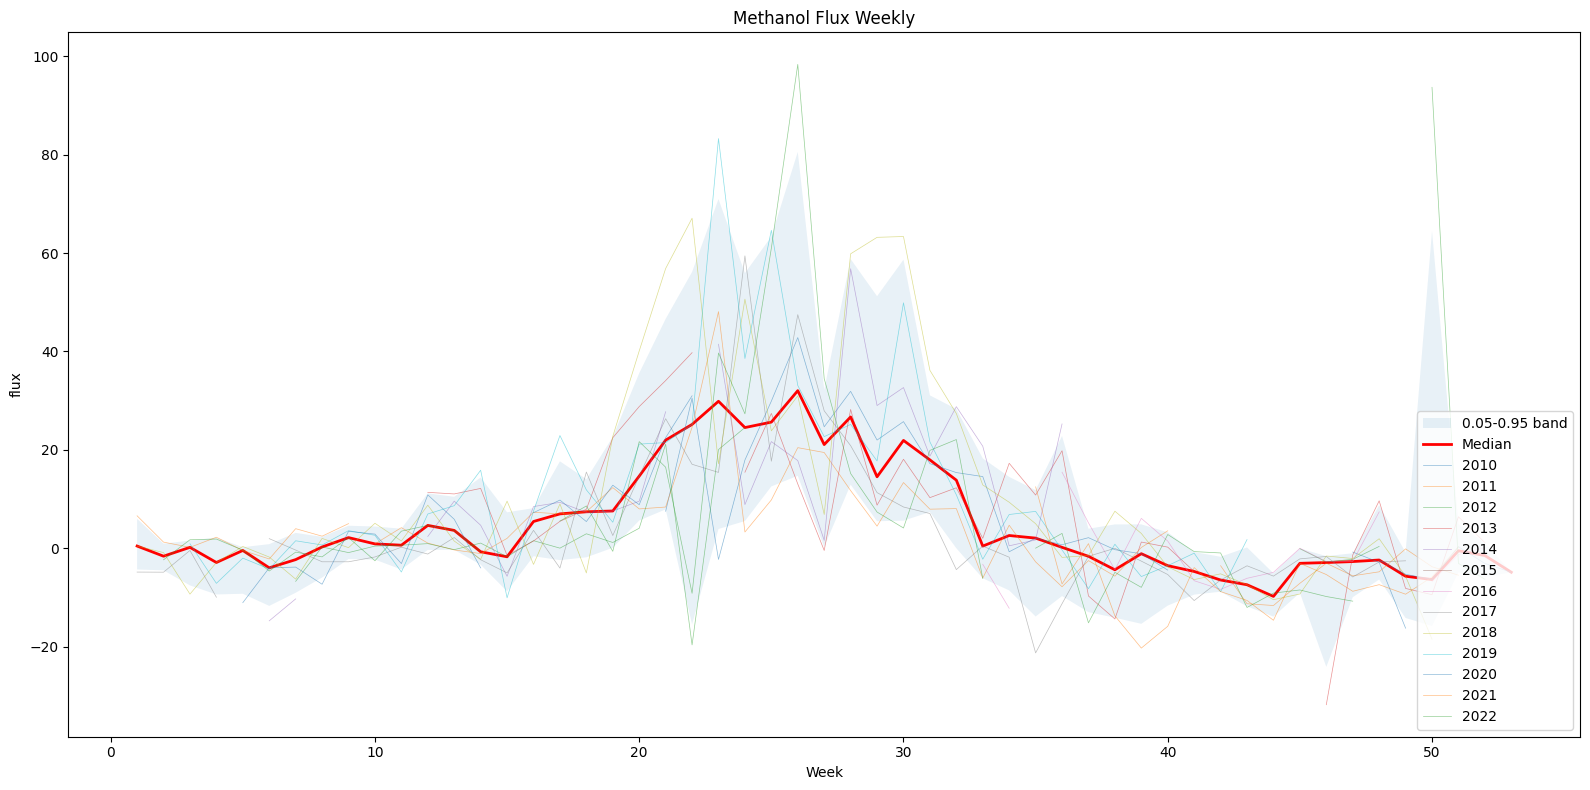

In [209]:
# Create a copy of the dataframe to avoid modifying the original
weekly_df2_years = weekly_df2.copy()

# Add a column for the week number
weekly_df2_years['week'] = weekly_df2_years['Datetime'].dt.isocalendar().week

# Add a column for the year
weekly_df2_years['year'] = weekly_df2_years['Datetime'].dt.isocalendar().year

# Drop the column 'Datetime'
weekly_df2_years = weekly_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
weekly_df2_years = weekly_df2_years.pivot(index='week', columns='year', values='methanol_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the 5th-95th percentile band
ax.fill_between(weekly_df2_years.index, weekly_df2_years.quantile(0.05, axis=1), weekly_df2_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
weekly_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
weekly_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Week')
ax.set_ylabel('flux')
ax.set_title('Methanol Flux Weekly')
ax.legend(['0.05-0.95 band', 'Median'] + weekly_df2_years.columns.tolist(), loc='lower right')

# Set y-axis limits 
# ax.set_ylim(-30, 250)

plt.tight_layout()
plt.show()

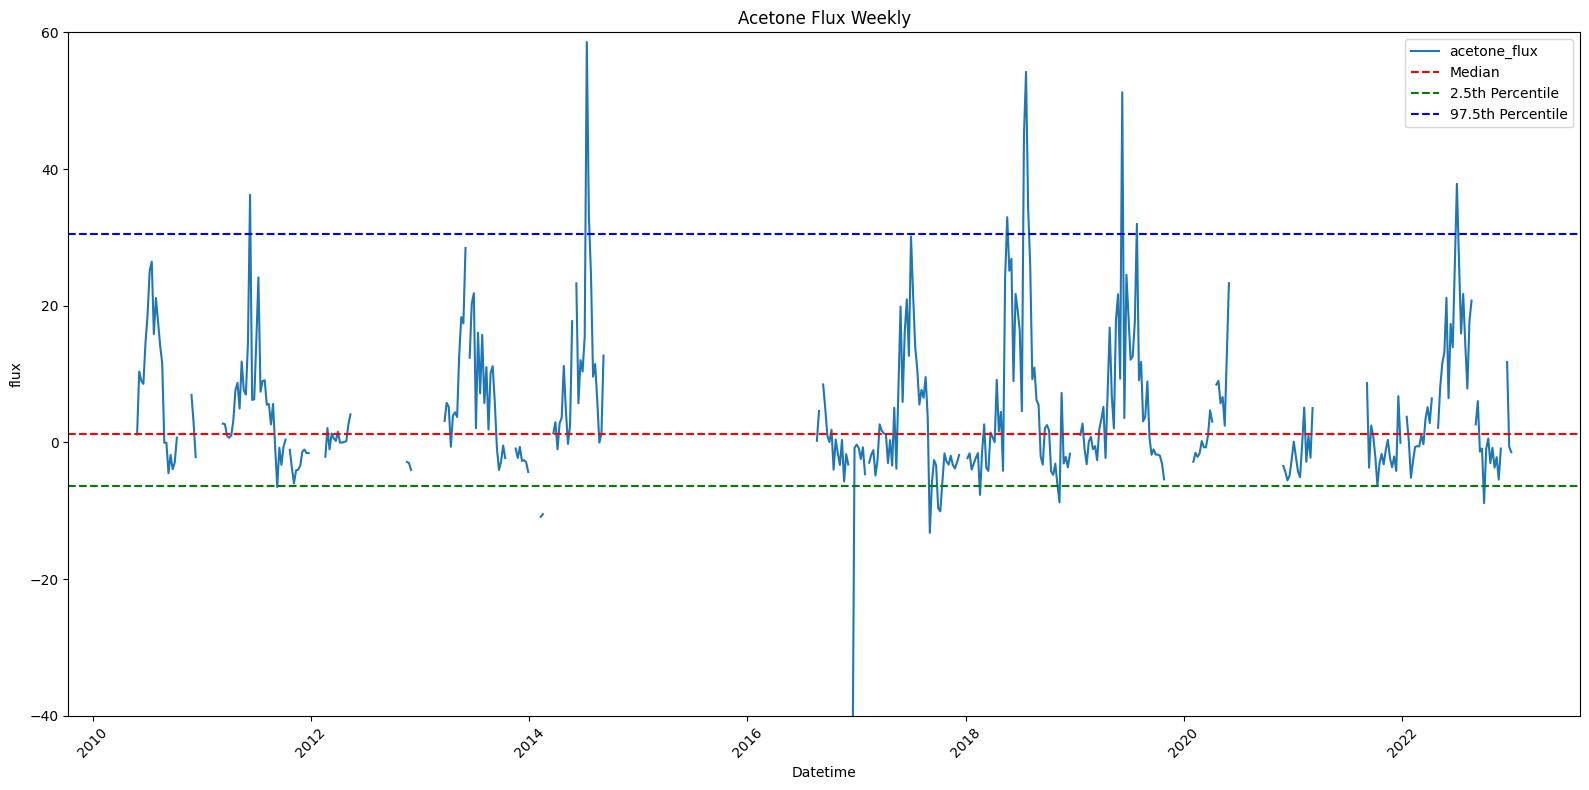

In [204]:
# Calculate median, 10th and 90th percentiles
weekly_df2['median'] = weekly_df2['acetone_flux'].median()
weekly_df2['q10'] = weekly_df2['acetone_flux'].quantile(0.1)
weekly_df2['q90'] = weekly_df2['acetone_flux'].quantile(0.9)

dates = weekly_df2['Datetime']  # Extract dates for clarity
values = weekly_df2['acetone_flux']  # Extract values for clarity

# Calculate additional statistics
median = values.median()
q025 = values.quantile(0.025)
q975 = values.quantile(0.975)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(dates, values, label='acetone_flux')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q025, color='g', linestyle='--', label='2.5th Percentile')
ax.axhline(y=q975, color='b', linestyle='--', label='97.5th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('flux')
ax.set_title('Acetone Flux Weekly')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Set y-axis limits 
ax.set_ylim(-40, 60)

plt.tight_layout()
plt.show()

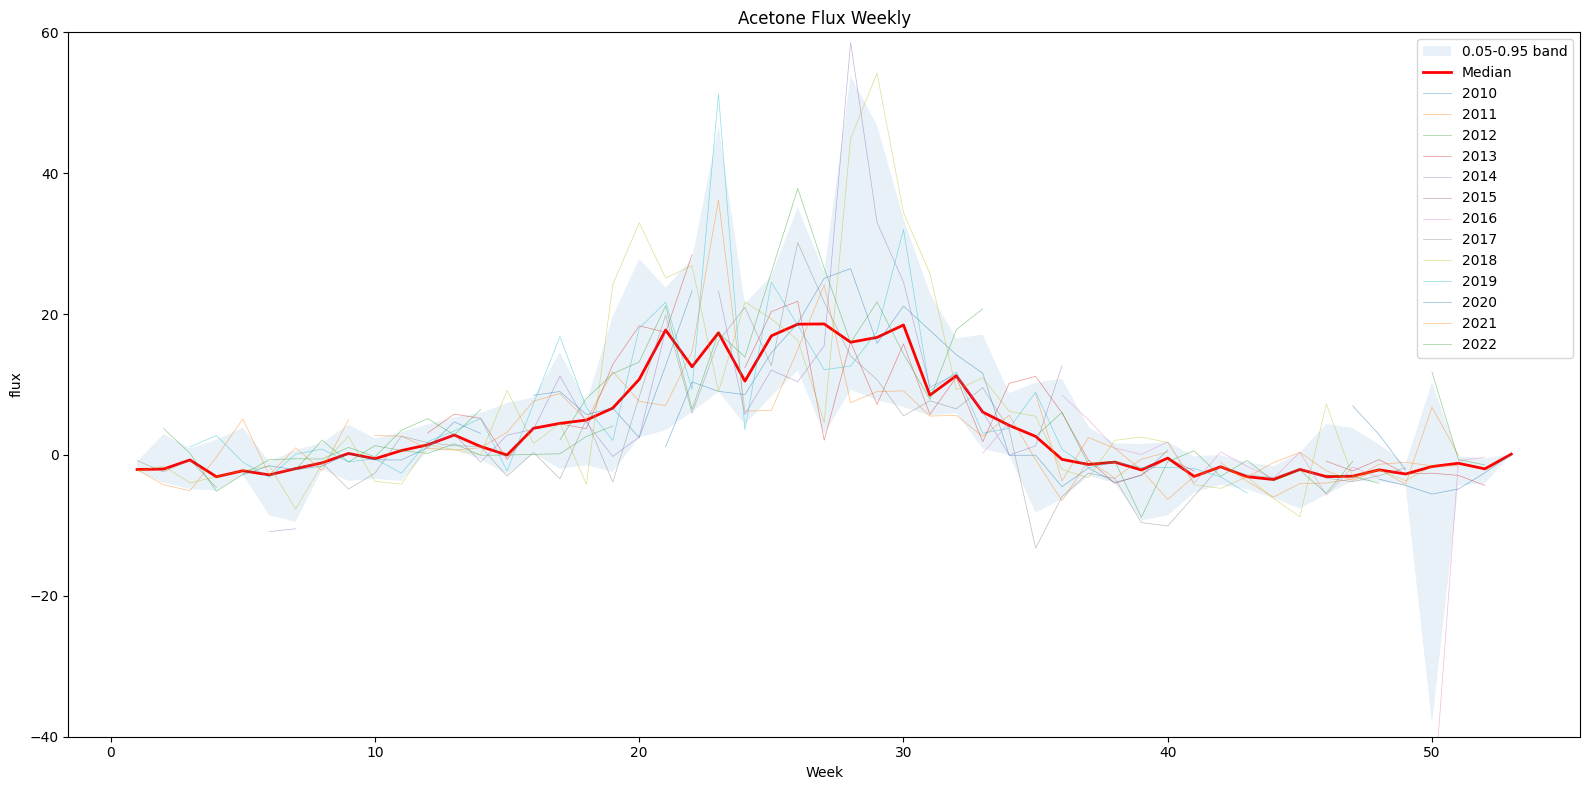

In [208]:
# Create a copy of the dataframe to avoid modifying the original
weekly_df2_years = weekly_df2.copy()

# Add a column for the week number
weekly_df2_years['week'] = weekly_df2_years['Datetime'].dt.isocalendar().week

# Add a column for the year
weekly_df2_years['year'] = weekly_df2_years['Datetime'].dt.isocalendar().year

# Drop the column 'Datetime'
weekly_df2_years = weekly_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
weekly_df2_years = weekly_df2_years.pivot(index='week', columns='year', values='acetone_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the 5th-95th percentile band
ax.fill_between(weekly_df2_years.index, weekly_df2_years.quantile(0.05, axis=1), weekly_df2_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
weekly_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
weekly_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Week')
ax.set_ylabel('flux')
ax.set_title('Acetone Flux Weekly')
ax.legend(['0.05-0.95 band', 'Median'] + weekly_df2_years.columns.tolist(), loc='upper right')

# Set y-axis limits 
ax.set_ylim(-40, 60)

plt.tight_layout()
plt.show()

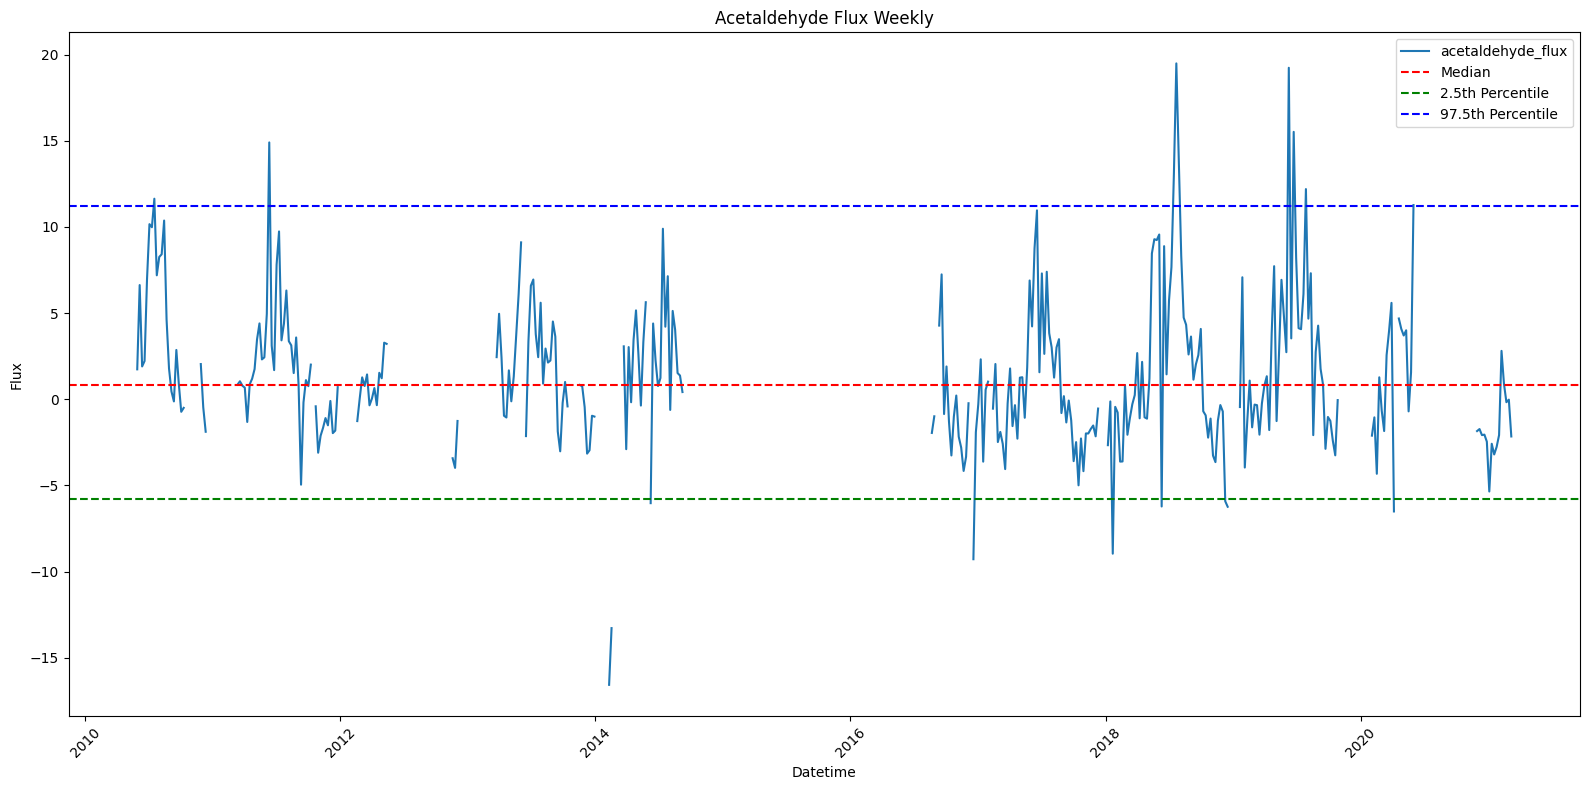

In [228]:
# Calculate median, 10th and 90th percentiles
weekly_df2['median'] = weekly_df2['acetaldehyde_flux'].median()
weekly_df2['q10'] = weekly_df2['acetaldehyde_flux'].quantile(0.1)
weekly_df2['q90'] = weekly_df2['acetaldehyde_flux'].quantile(0.9)

dates = weekly_df2['Datetime']  # Extract dates for clarity
values = weekly_df2['acetaldehyde_flux']  # Extract values for clarity

# Calculate additional statistics
median = values.median()
q025 = values.quantile(0.025)
q975 = values.quantile(0.975)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(dates, values, label='acetaldehyde_flux')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q025, color='g', linestyle='--', label='2.5th Percentile')
ax.axhline(y=q975, color='b', linestyle='--', label='97.5th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('Flux')
ax.set_title('Acetaldehyde Flux Weekly')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Set y-axis limits 
# ax.set_ylim(-40, 60)

plt.tight_layout()
plt.show()

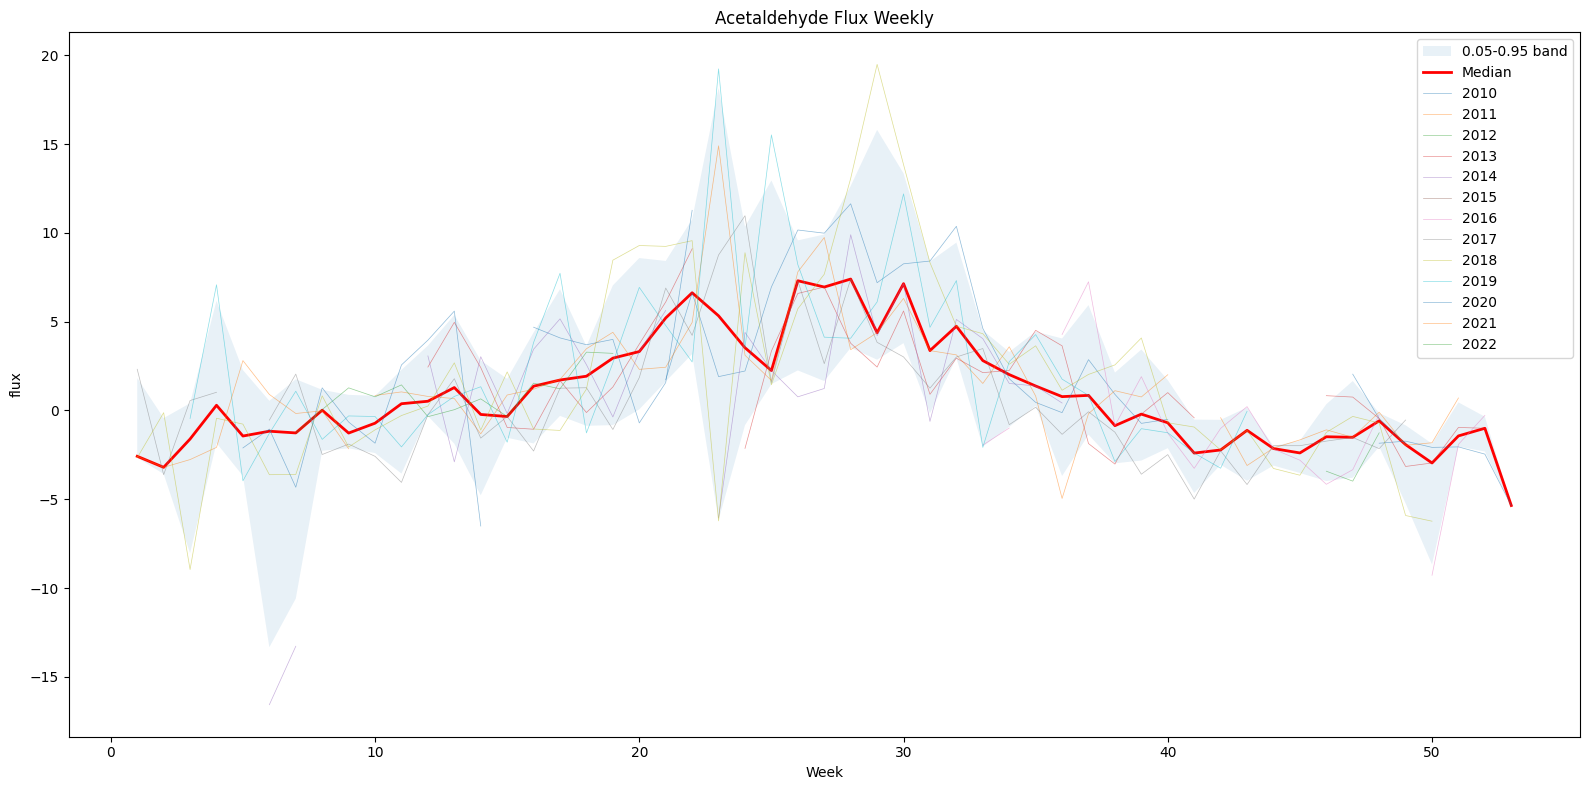

In [231]:
# Create a copy of the dataframe to avoid modifying the original
weekly_df2_years = weekly_df2.copy()

# Add a column for the week number
weekly_df2_years['week'] = weekly_df2_years['Datetime'].dt.isocalendar().week

# Add a column for the year
weekly_df2_years['year'] = weekly_df2_years['Datetime'].dt.isocalendar().year

# Drop the column 'Datetime'
weekly_df2_years = weekly_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
weekly_df2_years = weekly_df2_years.pivot(index='week', columns='year', values='acetaldehyde_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the 5th-95th percentile band
ax.fill_between(weekly_df2_years.index, weekly_df2_years.quantile(0.05, axis=1), weekly_df2_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
weekly_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
weekly_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Week')
ax.set_ylabel('flux')
ax.set_title('Acetaldehyde Flux Weekly')
ax.legend(['0.05-0.95 band', 'Median'] + weekly_df2_years.columns.tolist(), loc='upper right')

# Set y-axis limits 
# ax.set_ylim(-40, 60)

plt.tight_layout()
plt.show()

### Latent heat flux

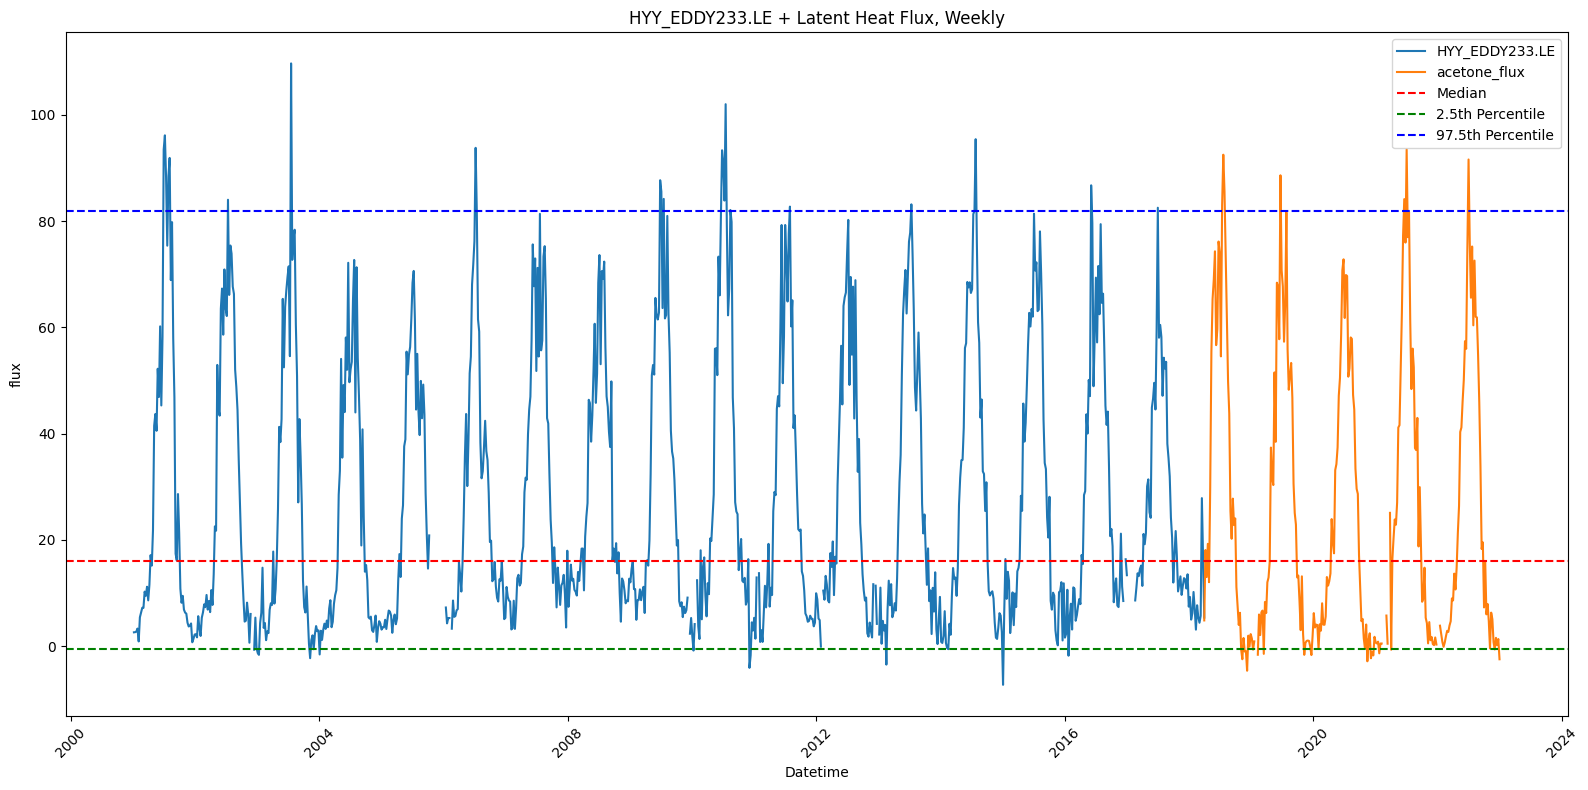

In [234]:
# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Calculate combined median and percentiles
combined_series = pd.concat([weekly_df4['HYY_EDDY233.LE'], weekly_df3['latent_heat_flux_after_4-2018']], axis=0)
median = combined_series.median()
q025 = combined_series.quantile(0.025)
q975 = combined_series.quantile(0.975)

# Plot the lines
ax.plot(weekly_df4['Datetime'], weekly_df4['HYY_EDDY233.LE'], label='HYY_EDDY233.LE')
ax.plot(weekly_df3['Datetime'], weekly_df3['latent_heat_flux_after_4-2018'], label='acetone_flux')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q025, color='g', linestyle='--', label='2.5th Percentile')
ax.axhline(y=q975, color='b', linestyle='--', label='97.5th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('flux')
ax.set_title('HYY_EDDY233.LE + Latent Heat Flux, Weekly')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Set y-axis limits 
# ax.set_ylim(-50, 125)

plt.tight_layout()
plt.show()

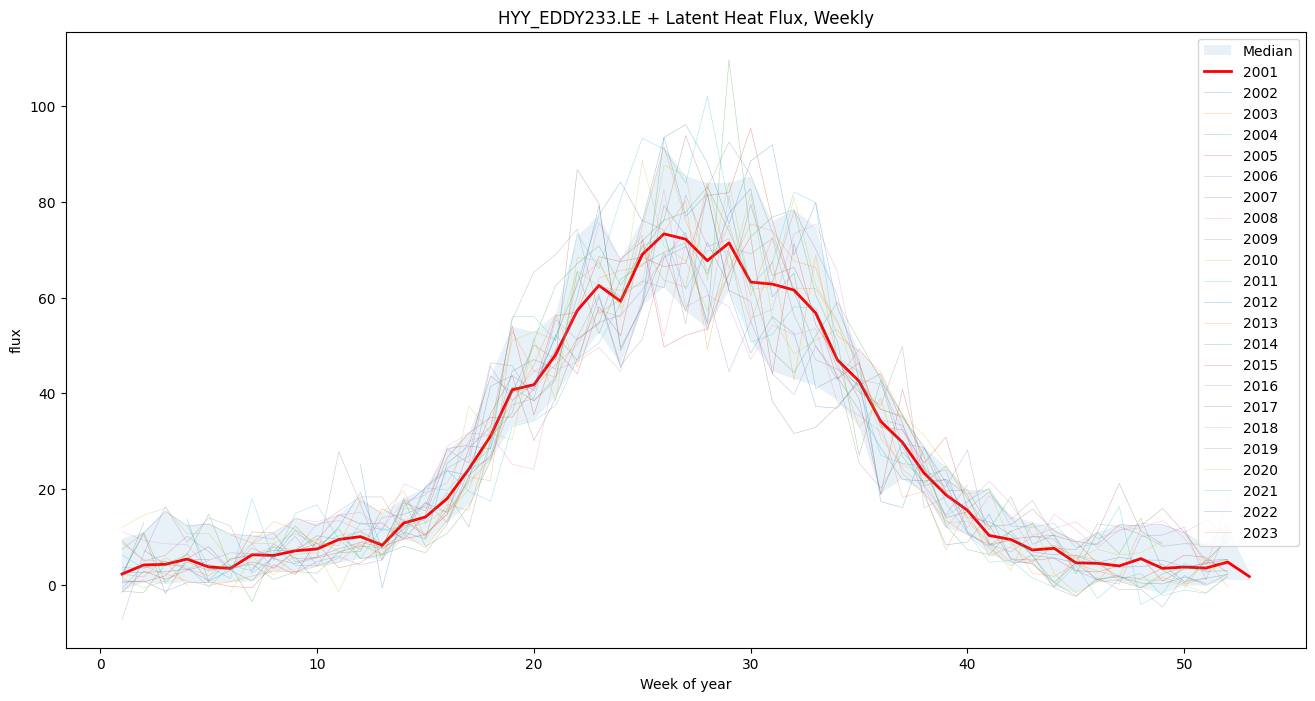

In [263]:
# Create a copy of the dataframe to avoid modifying the original
weekly_df3_years = weekly_df3.copy()
weekly_df4_years = weekly_df4.copy()

# Rename columns to 'flux'
weekly_df3_years = weekly_df3_years.rename(columns={'latent_heat_flux_after_4-2018': 'flux'})
weekly_df4_years = weekly_df4_years.rename(columns={'HYY_EDDY233.LE': 'flux'})

#Concatenate the dataframes
weekly_df34_years = pd.concat([weekly_df4_years[['Datetime', 'flux']],
                        weekly_df3_years[['Datetime', 'flux']]],
                       ignore_index=True)

# Add a column for the week of year
weekly_df34_years['week'] = weekly_df34_years['Datetime'].dt.isocalendar().week

# Add a column for the year
weekly_df34_years['year'] = weekly_df34_years['Datetime'].dt.year

# Drop the column 'Datetime'
weekly_df34_years = weekly_df34_years.drop(columns='Datetime')

# Aggregate duplicate rows by taking the mean of 'flux'
weekly_df34_years = weekly_df34_years.groupby(['week', 'year']).agg({'flux': 'mean'}).reset_index()

# Pivot the DataFrame so that rows are weeks and columns are years
weekly_df34_years = weekly_df34_years.pivot(index='week', columns='year', values='flux')

fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
ax.fill_between(weekly_df34_years.index, weekly_df34_years.quantile(0.1, axis=1), weekly_df34_years.quantile(0.9, axis=1), alpha=0.1)

# Plot the median
weekly_df34_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individual years
weekly_df34_years.plot(ax=ax, alpha=0.4, linewidth=0.4)

# Add labels, title, and legend
ax.set_xlabel('Week of year')
ax.set_ylabel('flux')
ax.set_title('HYY_EDDY233.LE + Latent Heat Flux, Weekly')
ax.legend(['Median'] + weekly_df34_years.columns.tolist(), loc='upper right')

# Set y-axis limits 
# ax.set_ylim(-30, 50)

# plt.tight_layout()
plt.show()


## Monthly data

In [291]:
monthly_df1 = df1.resample('ME', on = 'Datetime').mean().reset_index()
monthly_df2 = df2.resample('ME', on = 'Datetime').mean().reset_index()
monthly_df3 = df3.resample('ME', on = 'Datetime').mean().reset_index()
monthly_df4 = df4.resample('ME', on = 'Datetime').mean().reset_index()

### GPP NEE flux

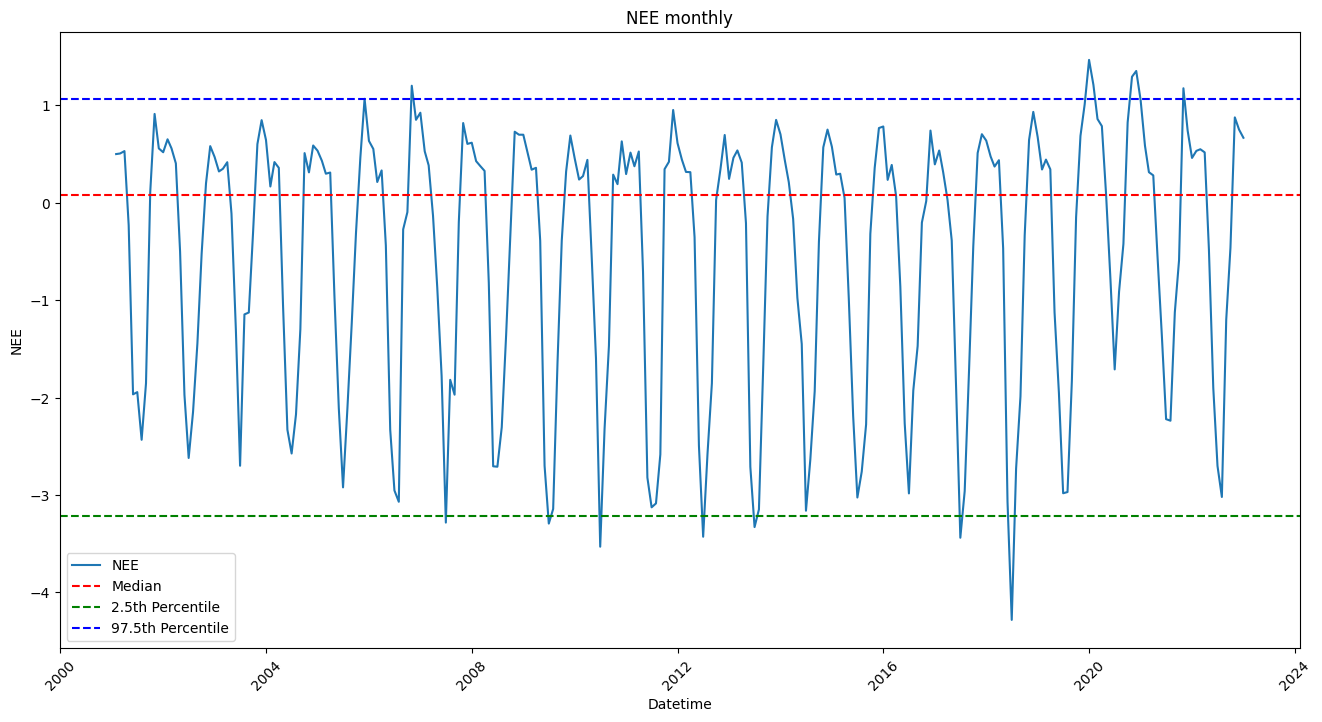

In [292]:
# Calculate median and the percentiles
median = monthly_df1['NEE'].median()
q025 = monthly_df1['NEE'].quantile(0.025)
q975 = monthly_df1['NEE'].quantile(0.975)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(monthly_df1['Datetime'] , monthly_df1['NEE'], label='NEE')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q025, color='g', linestyle='--', label='2.5th Percentile')
ax.axhline(y=q975, color='b', linestyle='--', label='97.5th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('NEE')
ax.set_title('NEE monthly')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Set y-axis limits 
# ax.set_ylim(-30, 50)

# plt.tight_layout()
plt.show()

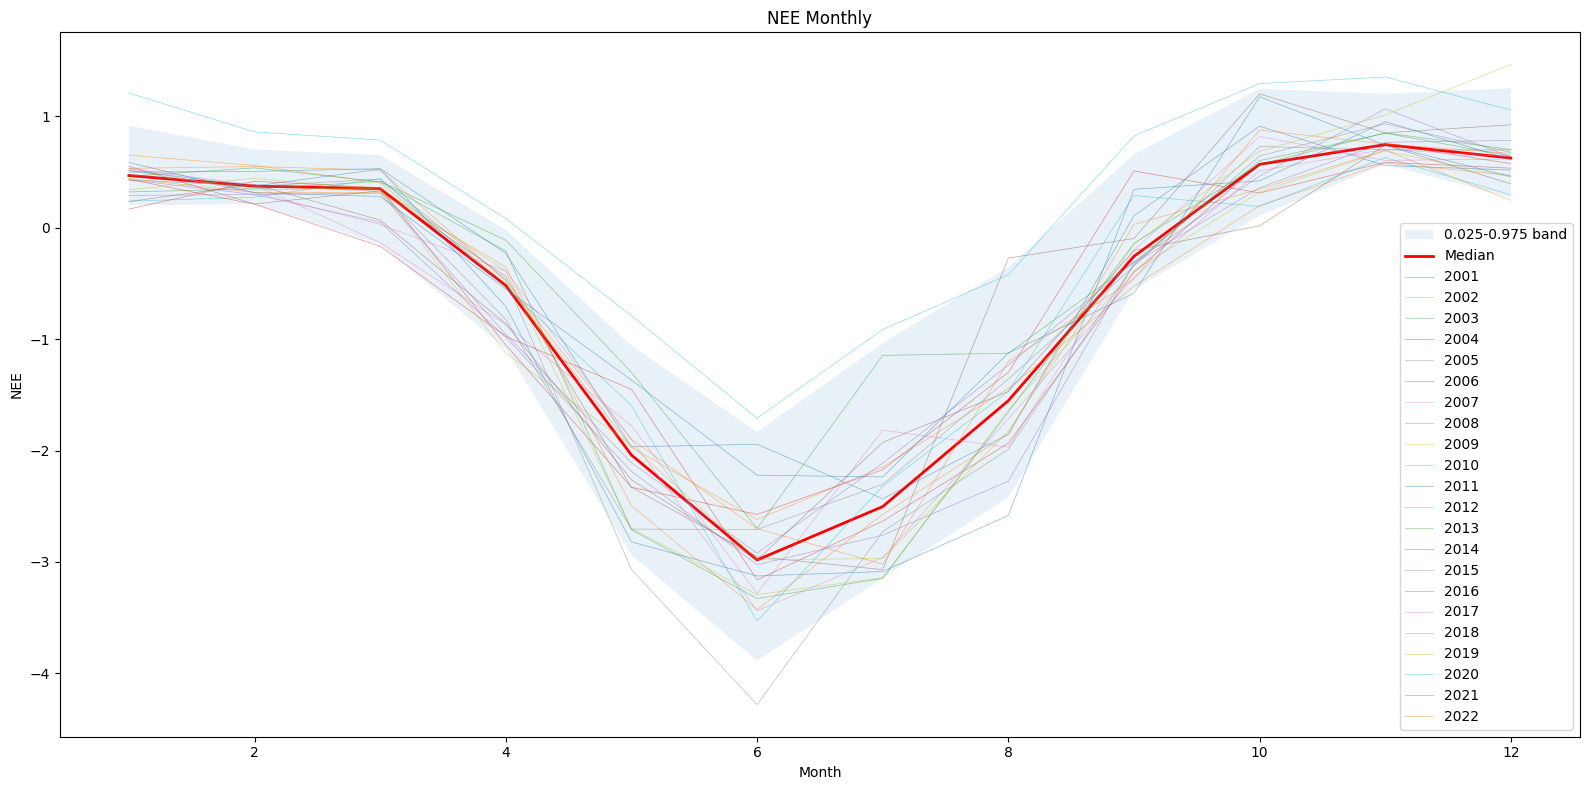

In [293]:
# Create a copy of the dataframe to avoid modifying the original
monthly_df1_years = monthly_df1.copy()

# Add a column for the month number
monthly_df1_years['month'] = monthly_df1_years['Datetime'].dt.month

# Add a column for the year
monthly_df1_years['year'] = monthly_df1_years['Datetime'].dt.year

# Drop the column 'Datetime'
monthly_df1_years = monthly_df1_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are months and columns are years
monthly_df1_years = monthly_df1_years.pivot(index='month', columns='year', values='NEE')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
ax.fill_between(monthly_df1_years.index, monthly_df1_years.quantile(0.025, axis=1), monthly_df1_years.quantile(0.975, axis=1), alpha=0.1)

# Plot the median
monthly_df1_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
monthly_df1_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('NEE')
ax.set_title('NEE Monthly')
ax.legend(['0.025-0.975 band', 'Median'] + monthly_df1_years.columns.tolist(), loc='lower right')

# Set y-axis limits 
# ax.set_ylim(-30, 50)

plt.tight_layout()
plt.show()

### VOC

<Axes: xlabel='Datetime'>

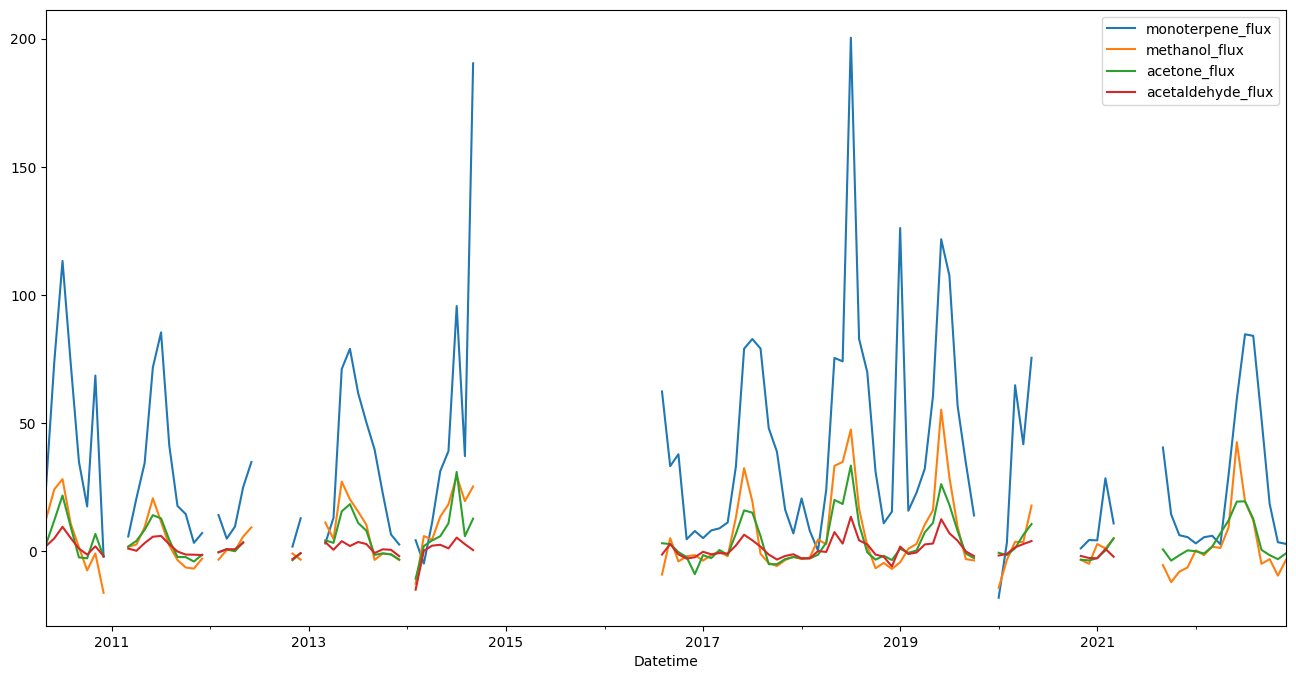

In [294]:
fig, ax = plt.subplots(figsize=(16,8))
monthly_df2.plot('Datetime', 'monoterpene_flux', ax=ax)
monthly_df2.plot('Datetime', 'methanol_flux', ax=ax)
monthly_df2.plot('Datetime', 'acetone_flux', ax=ax)
monthly_df2.plot('Datetime', 'acetaldehyde_flux', ax=ax)

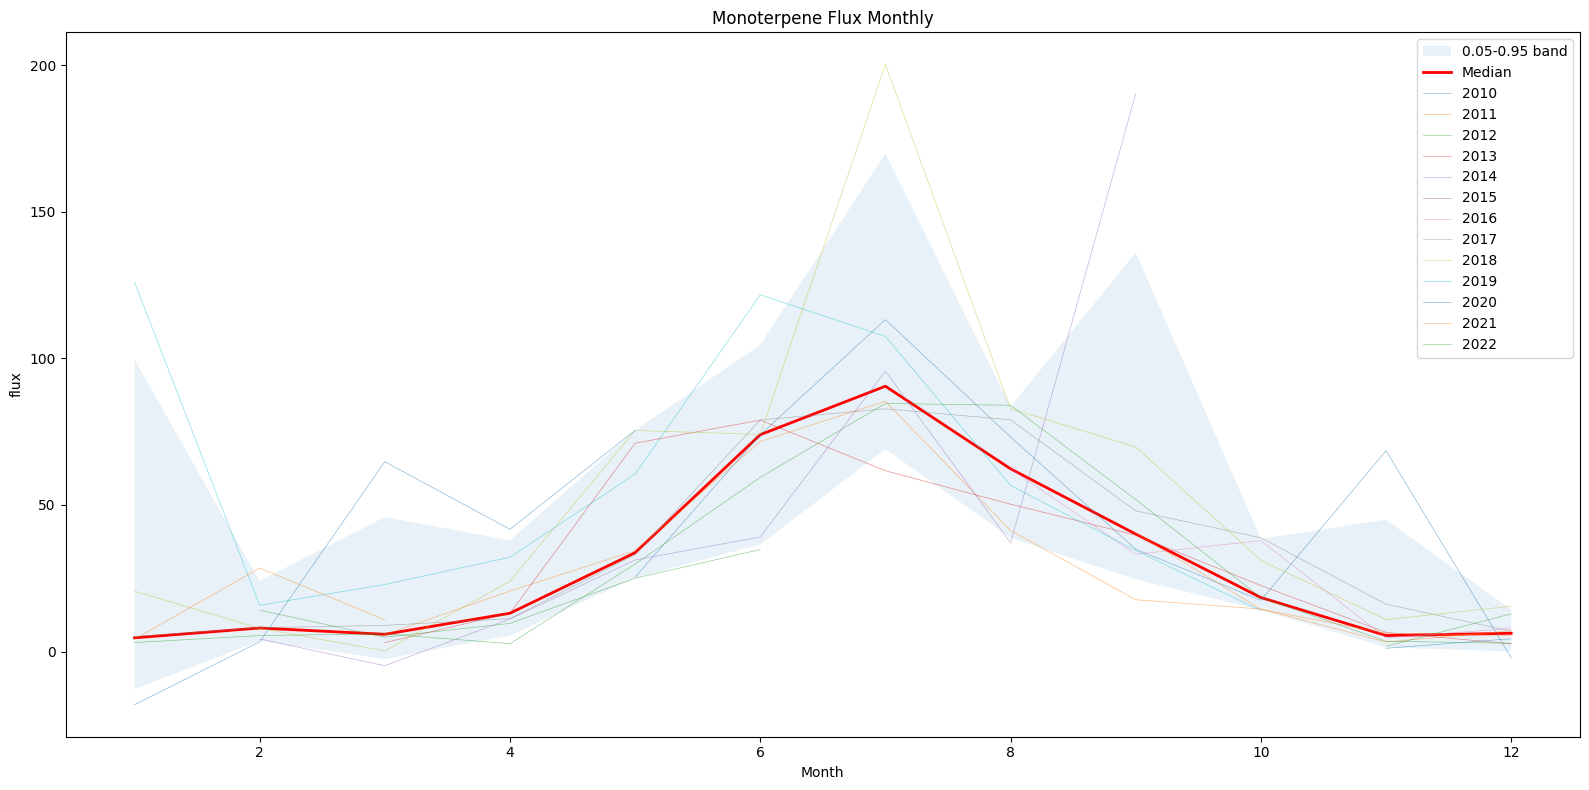

In [282]:
# Create a copy of the dataframe to avoid modifying the original
monthly_df2_years = monthly_df2.copy()

# Add a column for the month number
monthly_df2_years['month'] = monthly_df2_years['Datetime'].dt.month

# Add a column for the year
monthly_df2_years['year'] = monthly_df2_years['Datetime'].dt.year

# Drop the column 'Datetime'
monthly_df2_years = monthly_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are months and columns are years
monthly_df2_years = monthly_df2_years.pivot(index='month', columns='year', values='monoterpene_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
ax.fill_between(monthly_df2_years.index, monthly_df2_years.quantile(0.05, axis=1), monthly_df2_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
monthly_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
monthly_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Flux')
ax.set_title('Monoterpene Flux Monthly')
ax.legend(['0.05-0.95 band', 'Median'] + monthly_df2_years.columns.tolist(), loc='upper right')

# Set y-axis limits 
# ax.set_ylim(-30, 50)

plt.tight_layout()
plt.show()

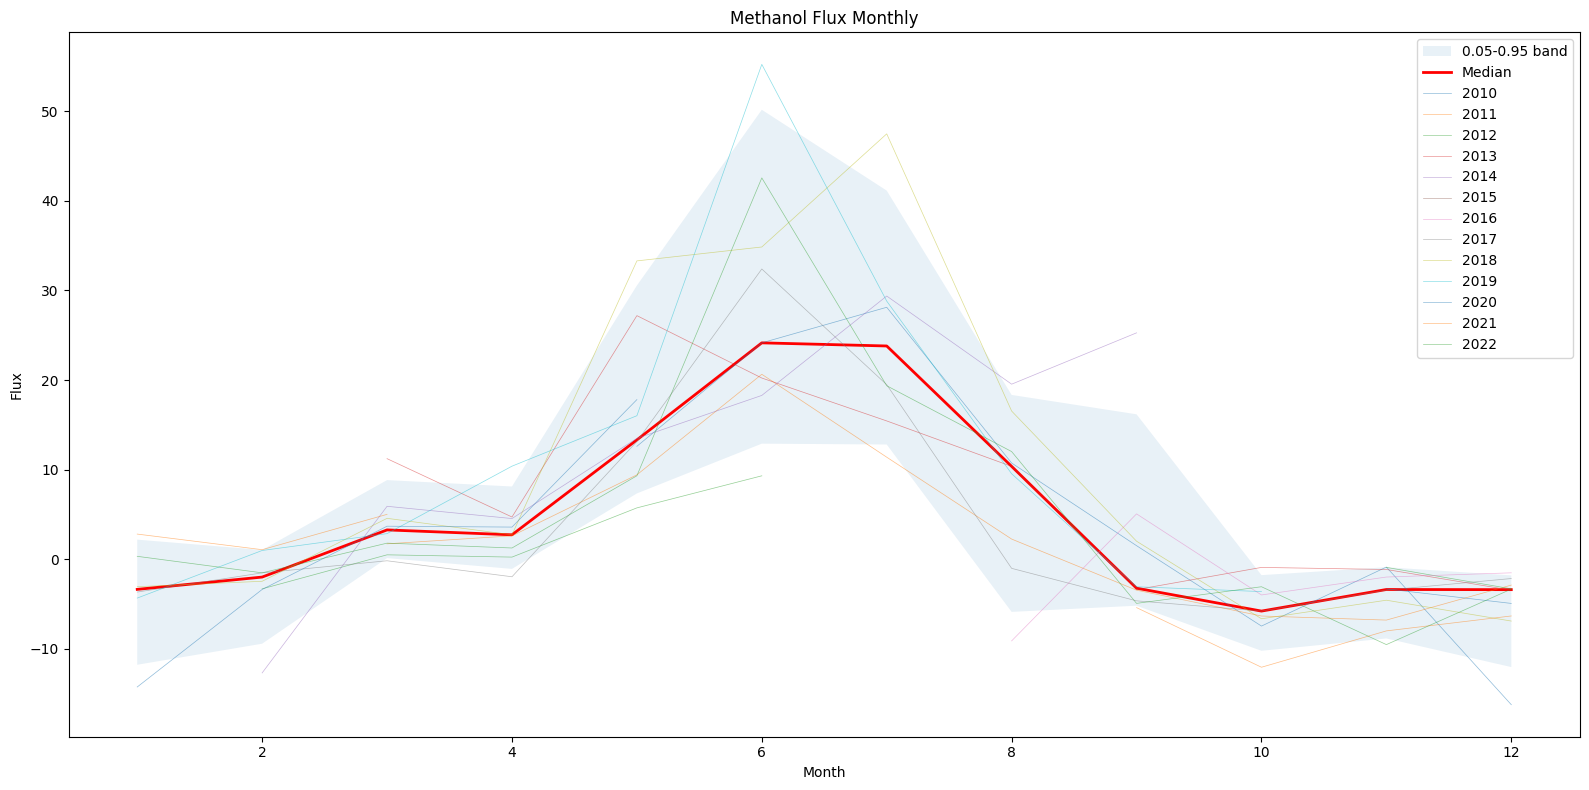

In [283]:
# Create a copy of the dataframe to avoid modifying the original
monthly_df2_years = monthly_df2.copy()

# Add a column for the month number
monthly_df2_years['month'] = monthly_df2_years['Datetime'].dt.month

# Add a column for the year
monthly_df2_years['year'] = monthly_df2_years['Datetime'].dt.year

# Drop the column 'Datetime'
monthly_df2_years = monthly_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are months and columns are years
monthly_df2_years = monthly_df2_years.pivot(index='month', columns='year', values='methanol_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
ax.fill_between(monthly_df2_years.index, monthly_df2_years.quantile(0.05, axis=1), monthly_df2_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
monthly_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
monthly_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Flux')
ax.set_title('Methanol Flux Monthly')
ax.legend(['0.05-0.95 band', 'Median'] + monthly_df2_years.columns.tolist(), loc='upper right')

# Set y-axis limits 
# ax.set_ylim(-30, 50)

plt.tight_layout()
plt.show()

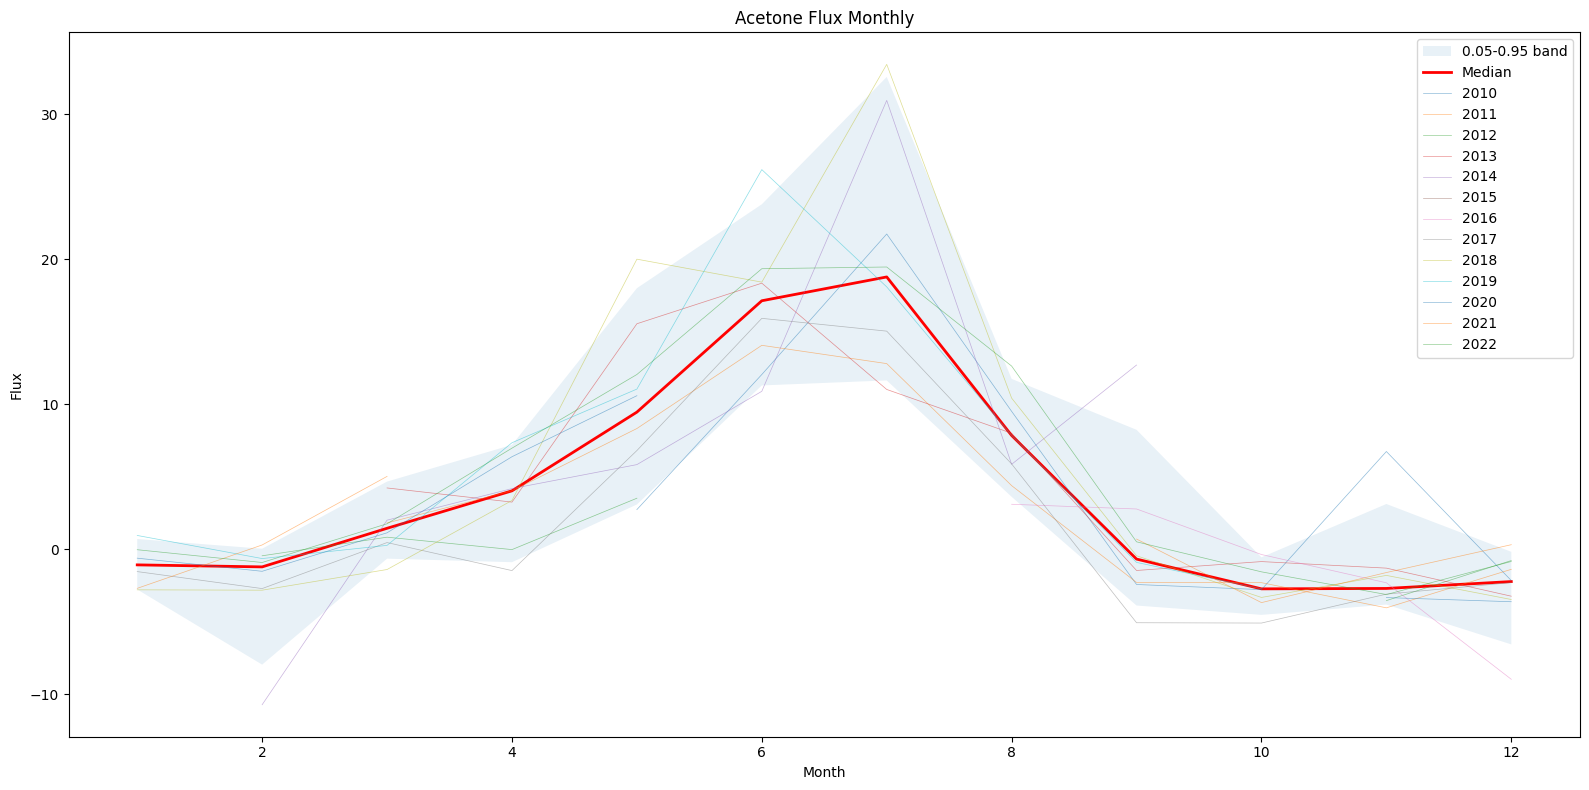

In [284]:
# Create a copy of the dataframe to avoid modifying the original
monthly_df2_years = monthly_df2.copy()

# Add a column for the month number
monthly_df2_years['month'] = monthly_df2_years['Datetime'].dt.month

# Add a column for the year
monthly_df2_years['year'] = monthly_df2_years['Datetime'].dt.year

# Drop the column 'Datetime'
monthly_df2_years = monthly_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are months and columns are years
monthly_df2_years = monthly_df2_years.pivot(index='month', columns='year', values='acetone_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
ax.fill_between(monthly_df2_years.index, monthly_df2_years.quantile(0.05, axis=1), monthly_df2_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
monthly_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
monthly_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Flux')
ax.set_title('Acetone Flux Monthly')
ax.legend(['0.05-0.95 band', 'Median'] + monthly_df2_years.columns.tolist(), loc='upper right')

# Set y-axis limits 
# ax.set_ylim(-30, 50)

plt.tight_layout()
plt.show()

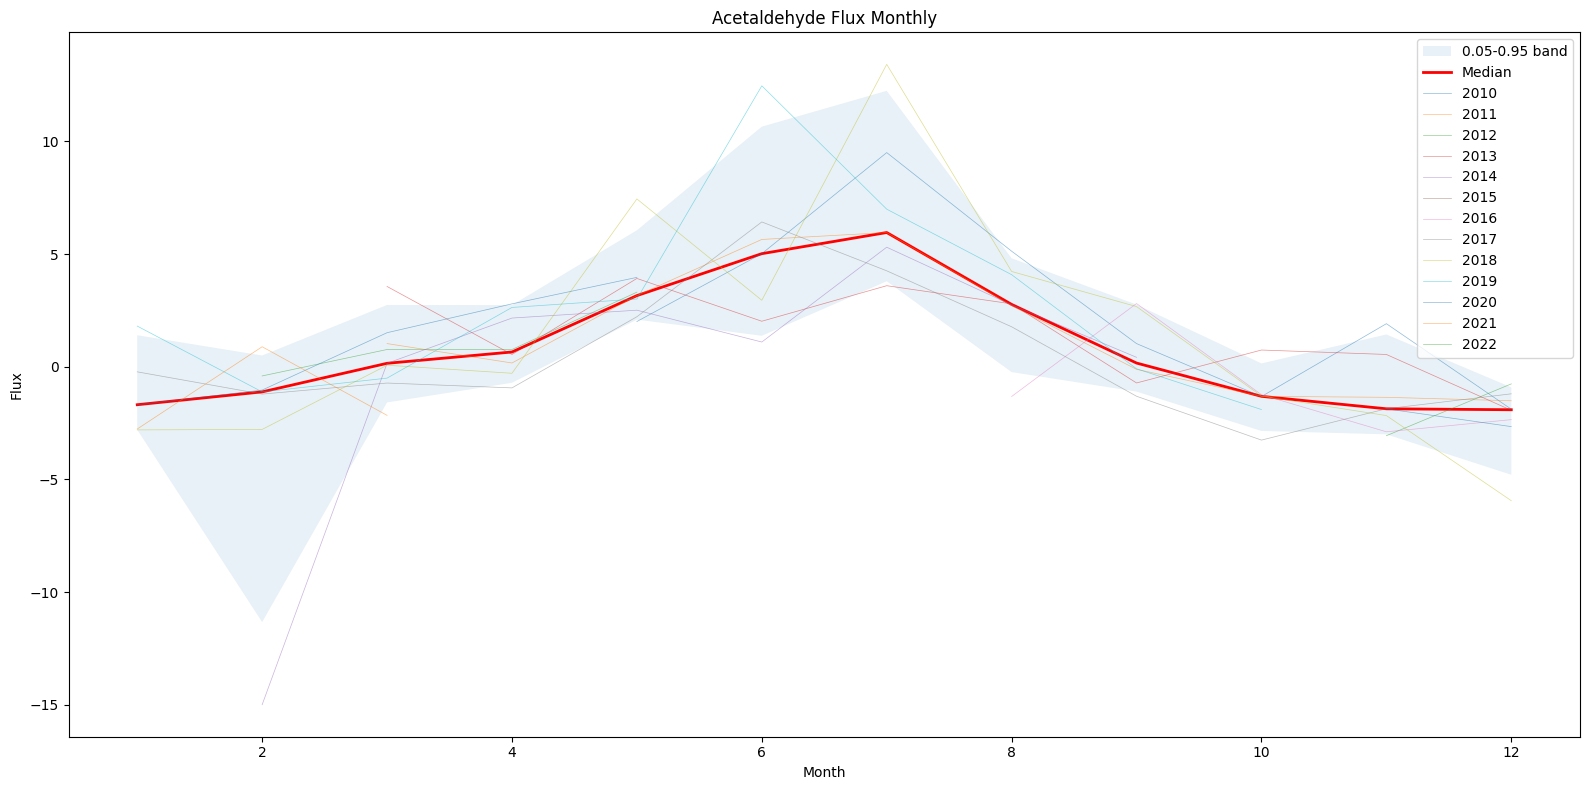

In [285]:
# Create a copy of the dataframe to avoid modifying the original
monthly_df2_years = monthly_df2.copy()

# Add a column for the month number
monthly_df2_years['month'] = monthly_df2_years['Datetime'].dt.month

# Add a column for the year
monthly_df2_years['year'] = monthly_df2_years['Datetime'].dt.year

# Drop the column 'Datetime'
monthly_df2_years = monthly_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are months and columns are years
monthly_df2_years = monthly_df2_years.pivot(index='month', columns='year', values='acetaldehyde_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
ax.fill_between(monthly_df2_years.index, monthly_df2_years.quantile(0.05, axis=1), monthly_df2_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
monthly_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
monthly_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Flux')
ax.set_title('Acetaldehyde Flux Monthly')
ax.legend(['0.05-0.95 band', 'Median'] + monthly_df2_years.columns.tolist(), loc='upper right')

# Set y-axis limits 
# ax.set_ylim(-30, 50)

plt.tight_layout()
plt.show()

### Latent heat flux

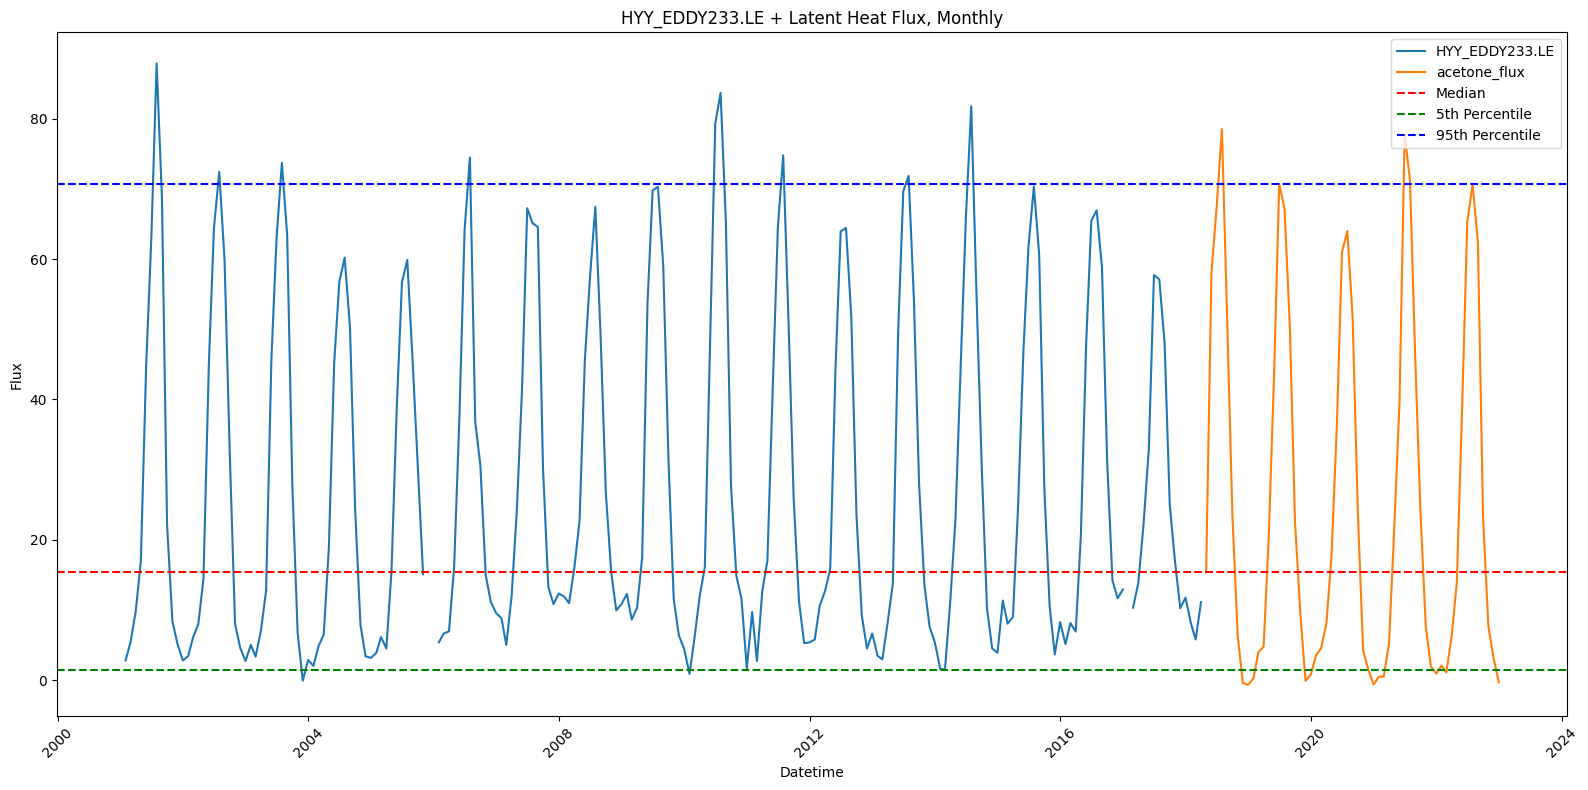

In [287]:
# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Calculate combined median and percentiles
combined_series = pd.concat([monthly_df4['HYY_EDDY233.LE'], monthly_df3['latent_heat_flux_after_4-2018']], axis=0)
median = combined_series.median()
q05 = combined_series.quantile(0.05)
q95 = combined_series.quantile(0.95)

# Plot the lines
ax.plot(monthly_df4['Datetime'], monthly_df4['HYY_EDDY233.LE'], label='HYY_EDDY233.LE')
ax.plot(monthly_df3['Datetime'], monthly_df3['latent_heat_flux_after_4-2018'], label='acetone_flux')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q05, color='g', linestyle='--', label='5th Percentile')
ax.axhline(y=q95, color='b', linestyle='--', label='95th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('Flux')
ax.set_title('HYY_EDDY233.LE + Latent Heat Flux, Monthly')
ax.legend(loc='upper right')

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Set y-axis limits 
# ax.set_ylim(-50, 125)

plt.tight_layout()
plt.show()

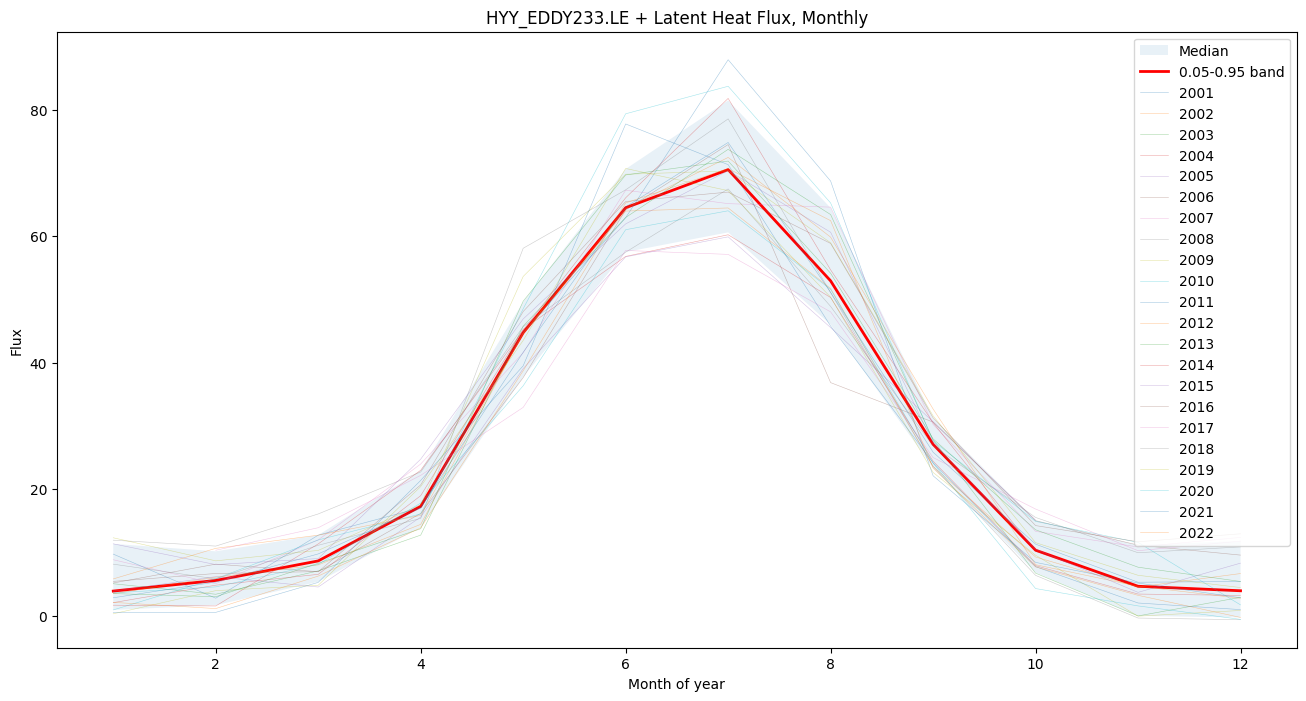

In [290]:
# Create a copy of the dataframe to avoid modifying the original
monthly_df3_years = monthly_df3.copy()
monthly_df4_years = monthly_df4.copy()

# Rename columns to 'flux'
monthly_df3_years = monthly_df3_years.rename(columns={'latent_heat_flux_after_4-2018': 'flux'})
monthly_df4_years = monthly_df4_years.rename(columns={'HYY_EDDY233.LE': 'flux'})

#Concatenate the dataframes
monthly_df34_years = pd.concat([monthly_df4_years[['Datetime', 'flux']],
                        monthly_df3_years[['Datetime', 'flux']]],
                       ignore_index=True)

# Add a column for the month of year
monthly_df34_years['month'] = monthly_df34_years['Datetime'].dt.month

# Add a column for the year
monthly_df34_years['year'] = monthly_df34_years['Datetime'].dt.year

# Drop the column 'Datetime'
monthly_df34_years = monthly_df34_years.drop(columns='Datetime')

# Aggregate duplicate rows by taking the mean of 'flux'
monthly_df34_years = monthly_df34_years.groupby(['month', 'year']).agg({'flux': 'mean'}).reset_index()

# Pivot the DataFrame so that rows are months and columns are years
monthly_df34_years = monthly_df34_years.pivot(index='month', columns='year', values='flux')

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
ax.fill_between(monthly_df34_years.index, monthly_df34_years.quantile(0.1, axis=1), monthly_df34_years.quantile(0.9, axis=1), alpha=0.1)

# Plot the median
monthly_df34_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individual years
monthly_df34_years.plot(ax=ax, alpha=0.4, linewidth=0.4)

# Add labels, title, and legend
ax.set_xlabel('Month of year')
ax.set_ylabel('Flux')
ax.set_title('HYY_EDDY233.LE + Latent Heat Flux, Monthly')
ax.legend(['Median', '0.05-0.95 band'] + monthly_df34_years.columns.tolist(), loc='upper right')

# Set y-axis limits 
# ax.set_ylim(-30, 50)

# plt.tight_layout()
plt.show()
